# APLICACIÓN DE MODELOS DE REGRESIÓN

# 1. Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


from sklearn.feature_selection import f_regression, mutual_info_regression

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error


from sklearn.metrics import PredictionErrorDisplay

from scipy import stats
import statsmodels.api as sm

import time

import warnings
warnings.filterwarnings('ignore')

# 2. Definición de funciones

Creamos una función **Optimizar_Hiperparametros** para realizar validación cruzada (cross-validation) en los modelos que vamos a utilizar, mediante **GridSearchCV** de *sklearn*. Esto nos permitirá encontar los mejores parámetros para un rendimiento óptimo del modelo.

La función recibe los siguientes parámetros:

- **model**: Modelo de regresión
- **parameters_grid**: Diccionario con los valores que queremos probar
- **n_folds**: nº de veces que se entrenará y se probará el modelo
- **sc**: Métrica que se desea estudiar
- **x_train, x_test, y_train, y_test**: Datos entrenamiento, test

La función devolverá en el *return* el mejor estimador dataframe con los resultados de la validación cruzada.

Al final también se mostrará por pantalla el tiempo empleado en la ejecución del programa mediante el método *time*.

In [2]:
def Optimizar_Hiperparametros(model, parameters_grid, n_folds, sc, x_train, y_train):
    
    inicio = time.time()
    
    print('--------------------------------------------------------------------------------------')
    print('---------------------------- OPTIMIZACIÓN DE PARÁMETROS ------------------------------')
    print('--------------------------------------------------------------------------------------')
    
    
    grid = GridSearchCV(model, scoring=sc, param_grid=param_grid, cv=n_folds, return_train_score=True, verbose=1)

    grid.fit(x_train, y_train)

    print("Mejores parámetros: {}".format(grid.best_params_))
    

    model_result = grid.best_estimator_
    
    
#     Se guarda en un dataframe los resultados obtenidos en la validación cruzada.
    df_grid_results = pd.DataFrame(grid.cv_results_)
    

    fin = time.time()
    
    print('Tiempo de ejecución (min):', (fin-inicio)/60)
    
    
    return model_result, df_grid_results

La función **Evaluacion_Modelo** aplica los métodos .fit() y .predict() sobre el modelo que se pase como parámetro, y devuelve el resultado de la predicción y el valor de las métricas R2, RMSE y MAPE del modelo para el estimador.

In [3]:
def Evaluacion_Modelo(model, x_train, x_test, y_train, y_test):
    
    inicio = time.time()
    
    print('--------------------------------------------------------------------------------------')
    print('------------------------------ EVALUACIÓN DEL MODELO ---------------------------------')
    print('--------------------------------------------------------------------------------------')
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    
    print('Coeficiente de determinación (R2): %0.5f' % r2)
    print('Raíz del Error Cuadrático Medio (RMSE): %0.5f' % rmse)
    print('Error Porcentual Absoluto Medio (MAPE): %0.5f' % mape)
    
    
    
    fin = time.time()
    
    print('Tiempo de ejecución (min):', (fin-inicio)/60)
    
    return y_pred

La función **Representar_Resultados** se utiliza para la visualización de los errores de predicción de los modelos de regresión.

In [4]:
def Representar_Resultados(y_real, y_pred, modelo, tipo_datos):
    
    
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))
    
    
    display = PredictionErrorDisplay(y_true=y_real, y_pred=y_pred)
    
    nombre_modelo = str(type(modelo))[:-2].split('.')[-1]
    
    if tipo_datos == 'con outliers':
        
        fig.suptitle('Modelo {} entrenado con outliers'.format(nombre_modelo), fontsize = 15, fontweight = "bold");
        
    else:
        
        fig.suptitle('Modelo {} entrenado sin outliers'.format(nombre_modelo), fontsize = 15, fontweight = "bold");
        
    
    
    # Distribución residuos
    
    display.plot(ax=axes[0], kind='residual_vs_predicted')
    
    # Predicción - valor real
    
    display.plot(ax=axes[1], kind='actual_vs_predicted')

# 3. Análisis exploratorio de los datos

In [5]:
nombre_fabricante = 'Vauxhall'

nombre_fichero = nombre_fabricante + '/' + 'df_cars_encoded_' + nombre_fabricante + '.csv'

In [6]:
df_cars_encoded = pd.read_csv(nombre_fichero, sep=',')

In [7]:
df_cars_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Birmingham                     827 non-null    float64
 1   Blackburn                      827 non-null    float64
 2   Bradford                       827 non-null    float64
 3   Chester                        827 non-null    float64
 4   Cleveland                      827 non-null    float64
 5   Darlington                     827 non-null    float64
 6   Doncaster                      827 non-null    float64
 7   Durham                         827 non-null    float64
 8   Exeter                         827 non-null    float64
 9   Guilford                       827 non-null    float64
 10  Halifax                        827 non-null    float64
 11  Harrogate                      827 non-null    float64
 12  Hemel                          827 non-null    flo

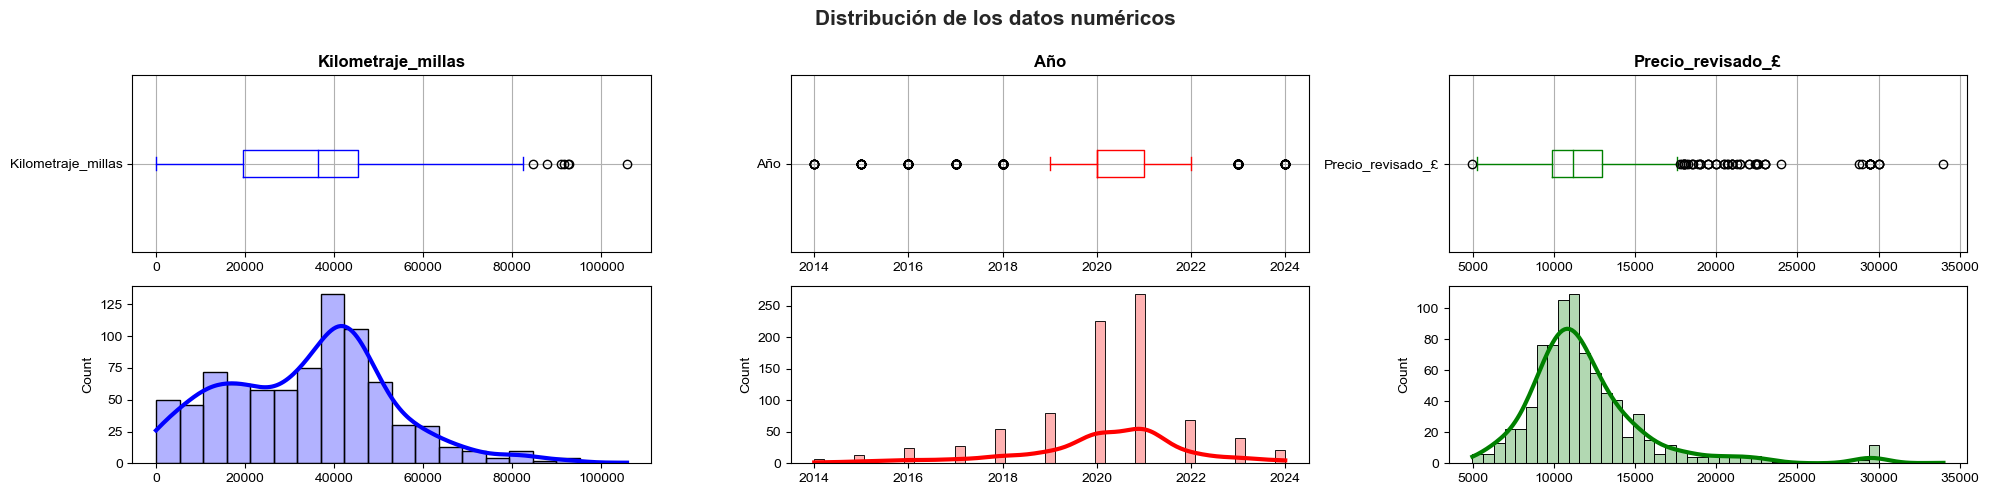

In [8]:
# Distribución de los datos numéricos

fig, axes = plt.subplots(2, 3, figsize=(20,5))

axes = axes.flat


# Diagramas de cajas (boxplot)


df_cars_encoded.boxplot(ax=axes[0], column='Kilometraje_millas', color = 'blue', vert=False)
axes[0].set_title('Kilometraje_millas', fontsize = 12, fontweight = "bold")
axes[0].tick_params(labelsize = 10)
axes[0].set_xlabel("")

df_cars_encoded.boxplot(ax=axes[1], column='Año', color = 'red', vert=False)
axes[1].set_title('Año', fontsize = 12, fontweight = "bold")
axes[1].tick_params(labelsize = 10)
axes[1].set_xlabel("")

df_cars_encoded.boxplot(ax=axes[2], column='Precio_revisado_£', color = 'green', vert=False)
axes[2].set_title('Precio_revisado_£', fontsize = 12, fontweight = "bold")
axes[2].tick_params(labelsize = 10)
axes[2].set_xlabel("")


# Histogramas


sb.histplot(
    data    = df_cars_encoded,
    x       = 'Kilometraje_millas',
    stat    = "count",
    kde     = True,
    color   = 'blue',
    line_kws= {'linewidth': 3},
    alpha   = 0.3,
    ax      = axes[3]
)


axes[3].tick_params(labelsize = 10)
axes[3].set_xlabel("")


sb.histplot(
    data    = df_cars_encoded,
    x       = 'Año',
    stat    = "count",
    kde     = True,
    color   = 'red',
    line_kws= {'linewidth': 3},
    alpha   = 0.3,
    ax      = axes[4]
)

axes[4].tick_params(labelsize = 10)
axes[4].set_xlabel("")


sb.histplot(
    data    = df_cars_encoded,
    x       = 'Precio_revisado_£',
    stat    = "count",
    kde     = True,
    color   = 'green',
    line_kws= {'linewidth': 3},
    alpha   = 0.3,
    ax      = axes[5]
)

axes[5].tick_params(labelsize = 10)
axes[5].set_xlabel("")


sb.set_style("darkgrid")
fig.tight_layout()
plt.subplots_adjust(top = 0.85)
fig.suptitle('Distribución de los datos numéricos', fontsize = 15, fontweight = "bold");

Se representan 3 variables: **Kilometraje_millas**, **Año**, **Precio_revisado_£**. Se utiliza la transparencia (alpha) para apreciar la densidad de los datos.

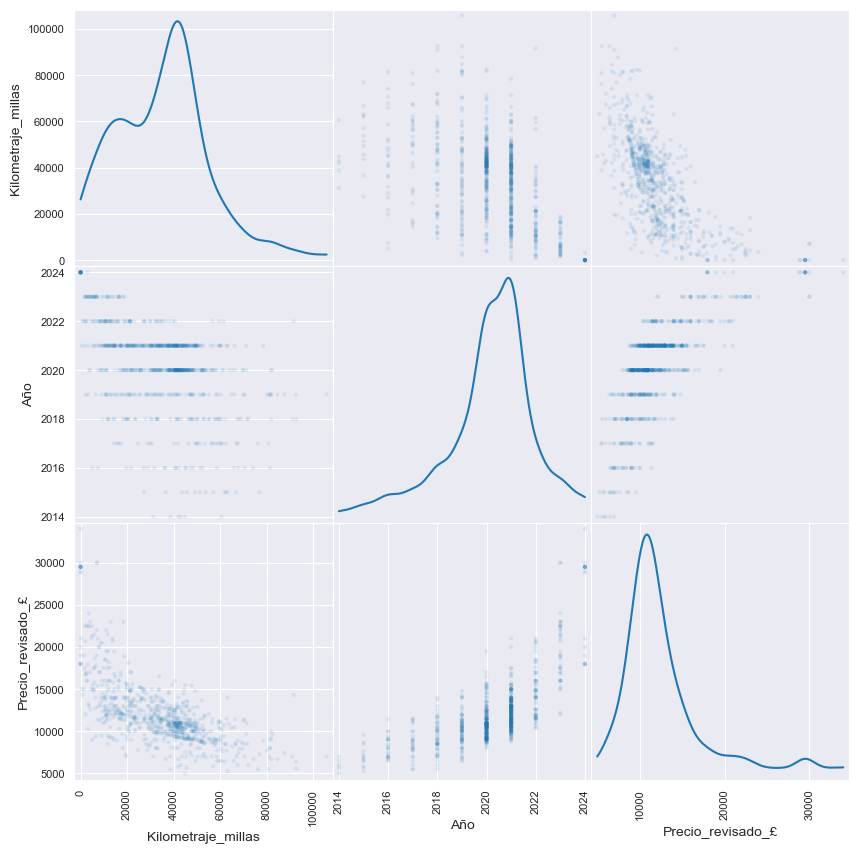

In [9]:
pd.plotting.scatter_matrix(df_cars_encoded.loc[:,['Kilometraje_millas', 'Año', 'Precio_revisado_£']], 
                           alpha=0.1, figsize=(10, 10), diagonal = 'kde')
plt.show()

Se observa que cuando los valores de kilometraje >= 80000 no se corresponden con valores atípicos de precios

In [10]:
df_cars_encoded[df_cars_encoded['Kilometraje_millas'] >= 80000].loc[:, ['Kilometraje_millas', 'Año', 'Precio_revisado_£']]

Kilometraje_millas   Año  Precio_revisado_£
3                 80833  2017               5495
5                 92685  2018               5550
12                92544  2019               6400
21                84650  2019               6700
22                81866  2019               6700
27                80995  2019               6990
29               105745  2019               6990
36                91000  2018               7000
44                87668  2019               7425
50                80069  2019               7700
58                81456  2016               7995
63                81407  2019               7999
120               81714  2020               8999
147               81850  2018               9200
186               82413  2020               9672
229               81954  2019               9999
689               91533  2022              14299

In [11]:
# Datos estadísticos

df_descriptive_st = df_cars_encoded.describe()
df_descriptive_st.T

count          mean           std     min      25%  \
Birmingham              827.0      0.009674      0.097936     0.0      0.0   
Blackburn               827.0      0.007255      0.084919     0.0      0.0   
Bradford                827.0      0.002418      0.049147     0.0      0.0   
Chester                 827.0      0.004837      0.069420     0.0      0.0   
Cleveland               827.0      0.003628      0.060156     0.0      0.0   
...                       ...           ...           ...     ...      ...   
Zafira Tourer           827.0      0.010883      0.103814     0.0      0.0   
Kilometraje_millas      827.0  34062.730351  18644.484199     0.0  19631.0   
Año                     827.0   2020.168077      1.803157  2014.0   2020.0   
Gastos_administrativos  827.0      0.095526      0.294118     0.0      0.0   
Precio_revisado_£       827.0  12016.226119   3913.269778  4995.0   9896.5   

                            50%      75%       max  
Birmingham                  0.0      0.0       1.0  
Blackburn                   0.0      0.0       1.0  
Bradford                    0.0      0.0       1.0  
Chester                     0.0      0.0       1.0  
Cleveland                   0.0      0.0       1.0  
...                         ...      ...       ...  
Zafira Tourer               0.0      0.0       1.0  
Kilometraje_millas      36265.0  45372.5  105745.0  
Año                      2020.0   2021.0    2024.0  
Gastos_administrativos      0.0      0.0       1.0  
Precio_revisado_£       11199.0  13000.0   33995.0  

[67 rows x 8 columns]

In [12]:
# Comprobar valores atípicos extremos


q3 = df_descriptive_st.T.loc['Precio_revisado_£', '75%']
q1 = df_descriptive_st.T.loc['Precio_revisado_£', '25%']

iqr = q3 - q1

lie = q1 - (3 * iqr)
lse = q3 + (3 * iqr)

print('Límite inferior extremo:', lie)
print('Límite superior extremo:', lse)

Límite inferior extremo: 586.0
Límite superior extremo: 22310.5


Se eliminan los valores atípicos de **Precio_revisado_£**

In [13]:
df_cars_encoded_outliers = df_cars_encoded[df_cars_encoded['Precio_revisado_£'] < lse]

In [14]:
df_cars_encoded_outliers_descriptive_st = df_cars_encoded_outliers.describe()

col_null = df_cars_encoded_outliers_descriptive_st.T[df_cars_encoded_outliers_descriptive_st.T['mean'] == 0].index.tolist()

print('Columnas vacías:', col_null)

Columnas vacías: ['Astra Electric', 'Vivaro']


In [15]:
# Eliminar columnas vacías

df_cars_encoded_outliers.drop(columns=col_null, axis = 1, inplace=True)

Se pide al usuario que indique si quiere utilizar los datos con *outliers* o sin *outliers*. Dependiendo de la respuesta se utiliza un *dataframe* u otro, además de los datos de validación correspondientes procedentes de la web https://www.motors.co.uk/used-cars/local/england/

In [16]:
while True:
    respuesta = input('¿Utilizar datos con outliers? Si/No ').lower()
    if respuesta == 'si':
        print('Opción seleccionada: Datos con outliers')
        df_datos = df_cars_encoded
        ruta = 'Datos_validación/' + nombre_fabricante
        df_cars_test = pd.read_excel(ruta + '/' + nombre_fabricante.lower() + '_validación_con_outliers.xlsx')
        tipo_datos = 'con outliers'
        break
    elif respuesta == 'no':
        print('Opción seleccionada: Datos sin outliers')
        ruta = 'Datos_validación/' + nombre_fabricante
        df_datos = df_cars_encoded_outliers
        df_cars_test = pd.read_excel(ruta + '/' + nombre_fabricante.lower() + '_validación_sin_outliers.xlsx')
        tipo_datos = 'sin outliers'
        break
    else:
        print('Por favor, introduzca Si o No')

¿Utilizar datos con outliers? Si/No si
Opción seleccionada: Datos con outliers


# 4. Selección de características

Se comprueba si existe correlación entre variables independientes

<Axes: >

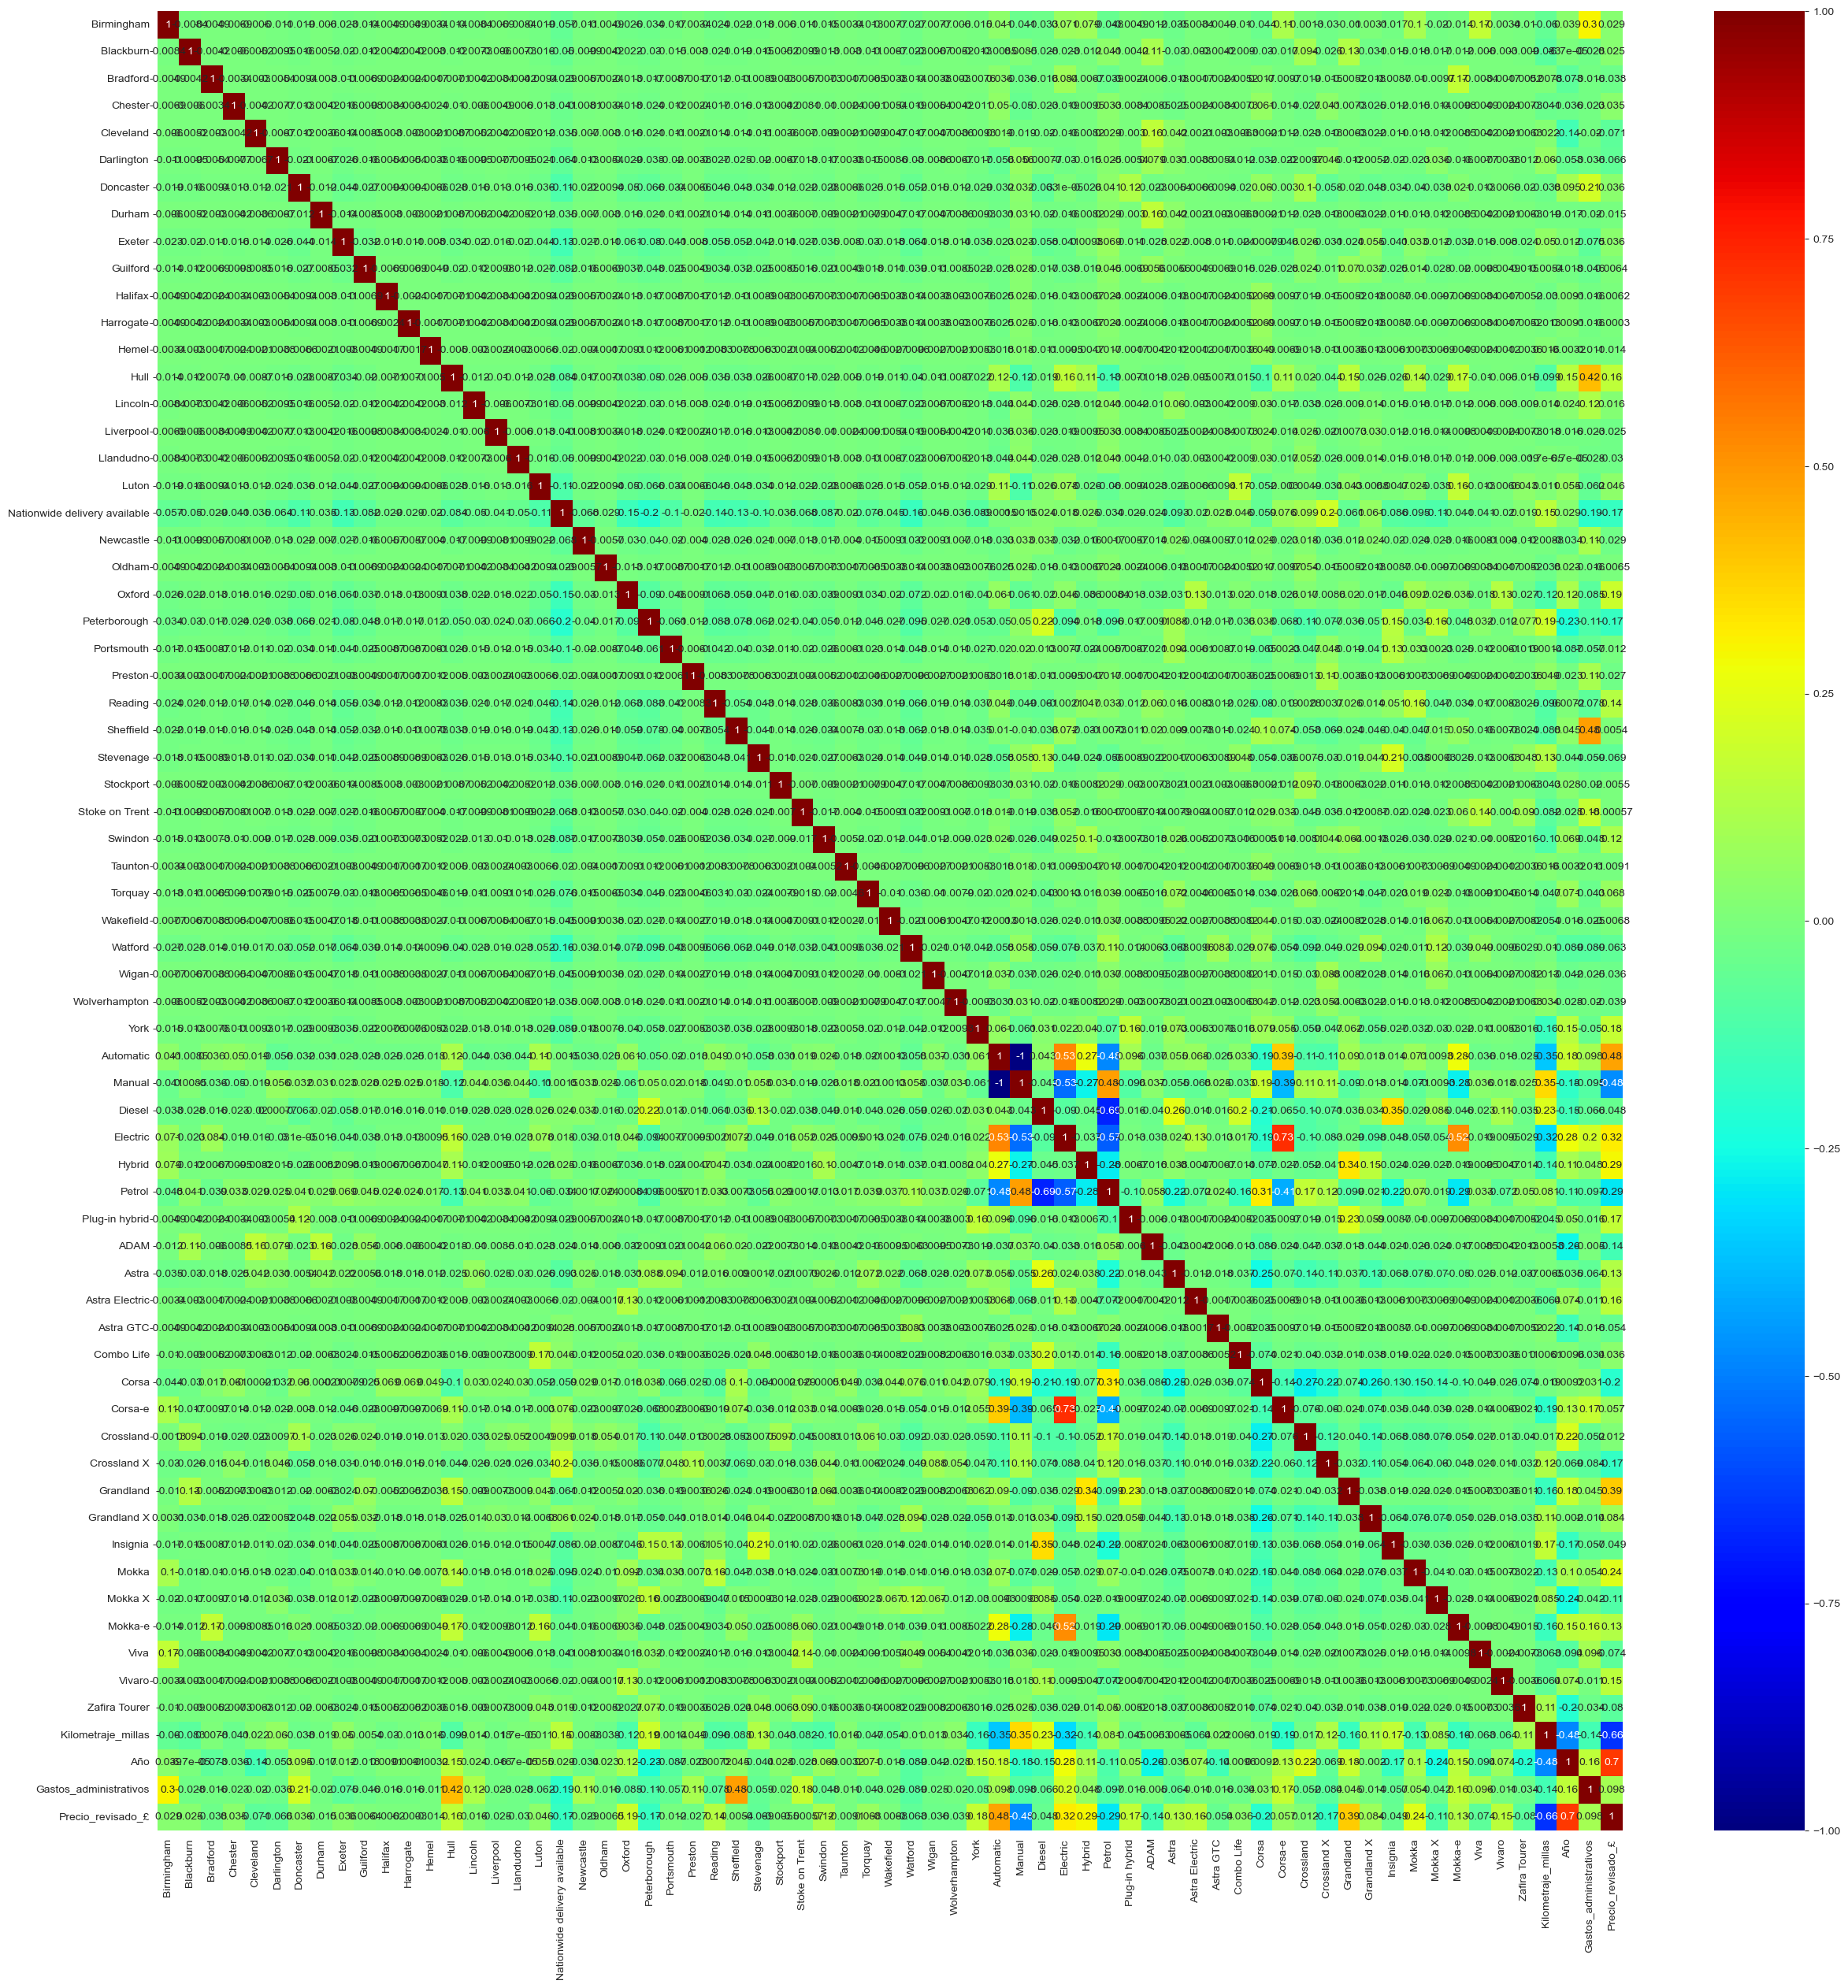

In [17]:
fig, ax = plt.subplots(figsize=(30,30))
corr = df_datos.corr()
sb.heatmap(corr, cmap="jet", center=0, vmin=-1, vmax=1, annot=True, ax=ax)

Se comprueba si existe correlación entre variables independientes quitando las ciudades para una mejor visualización.

In [18]:
# Eliminar ciudades

count = 0

for col in df_cars_encoded_outliers.columns:
    if col == 'Automatic':
        df_datos_resumen = df_datos.iloc[:, count:]
    else:
        count += 1

<Axes: >

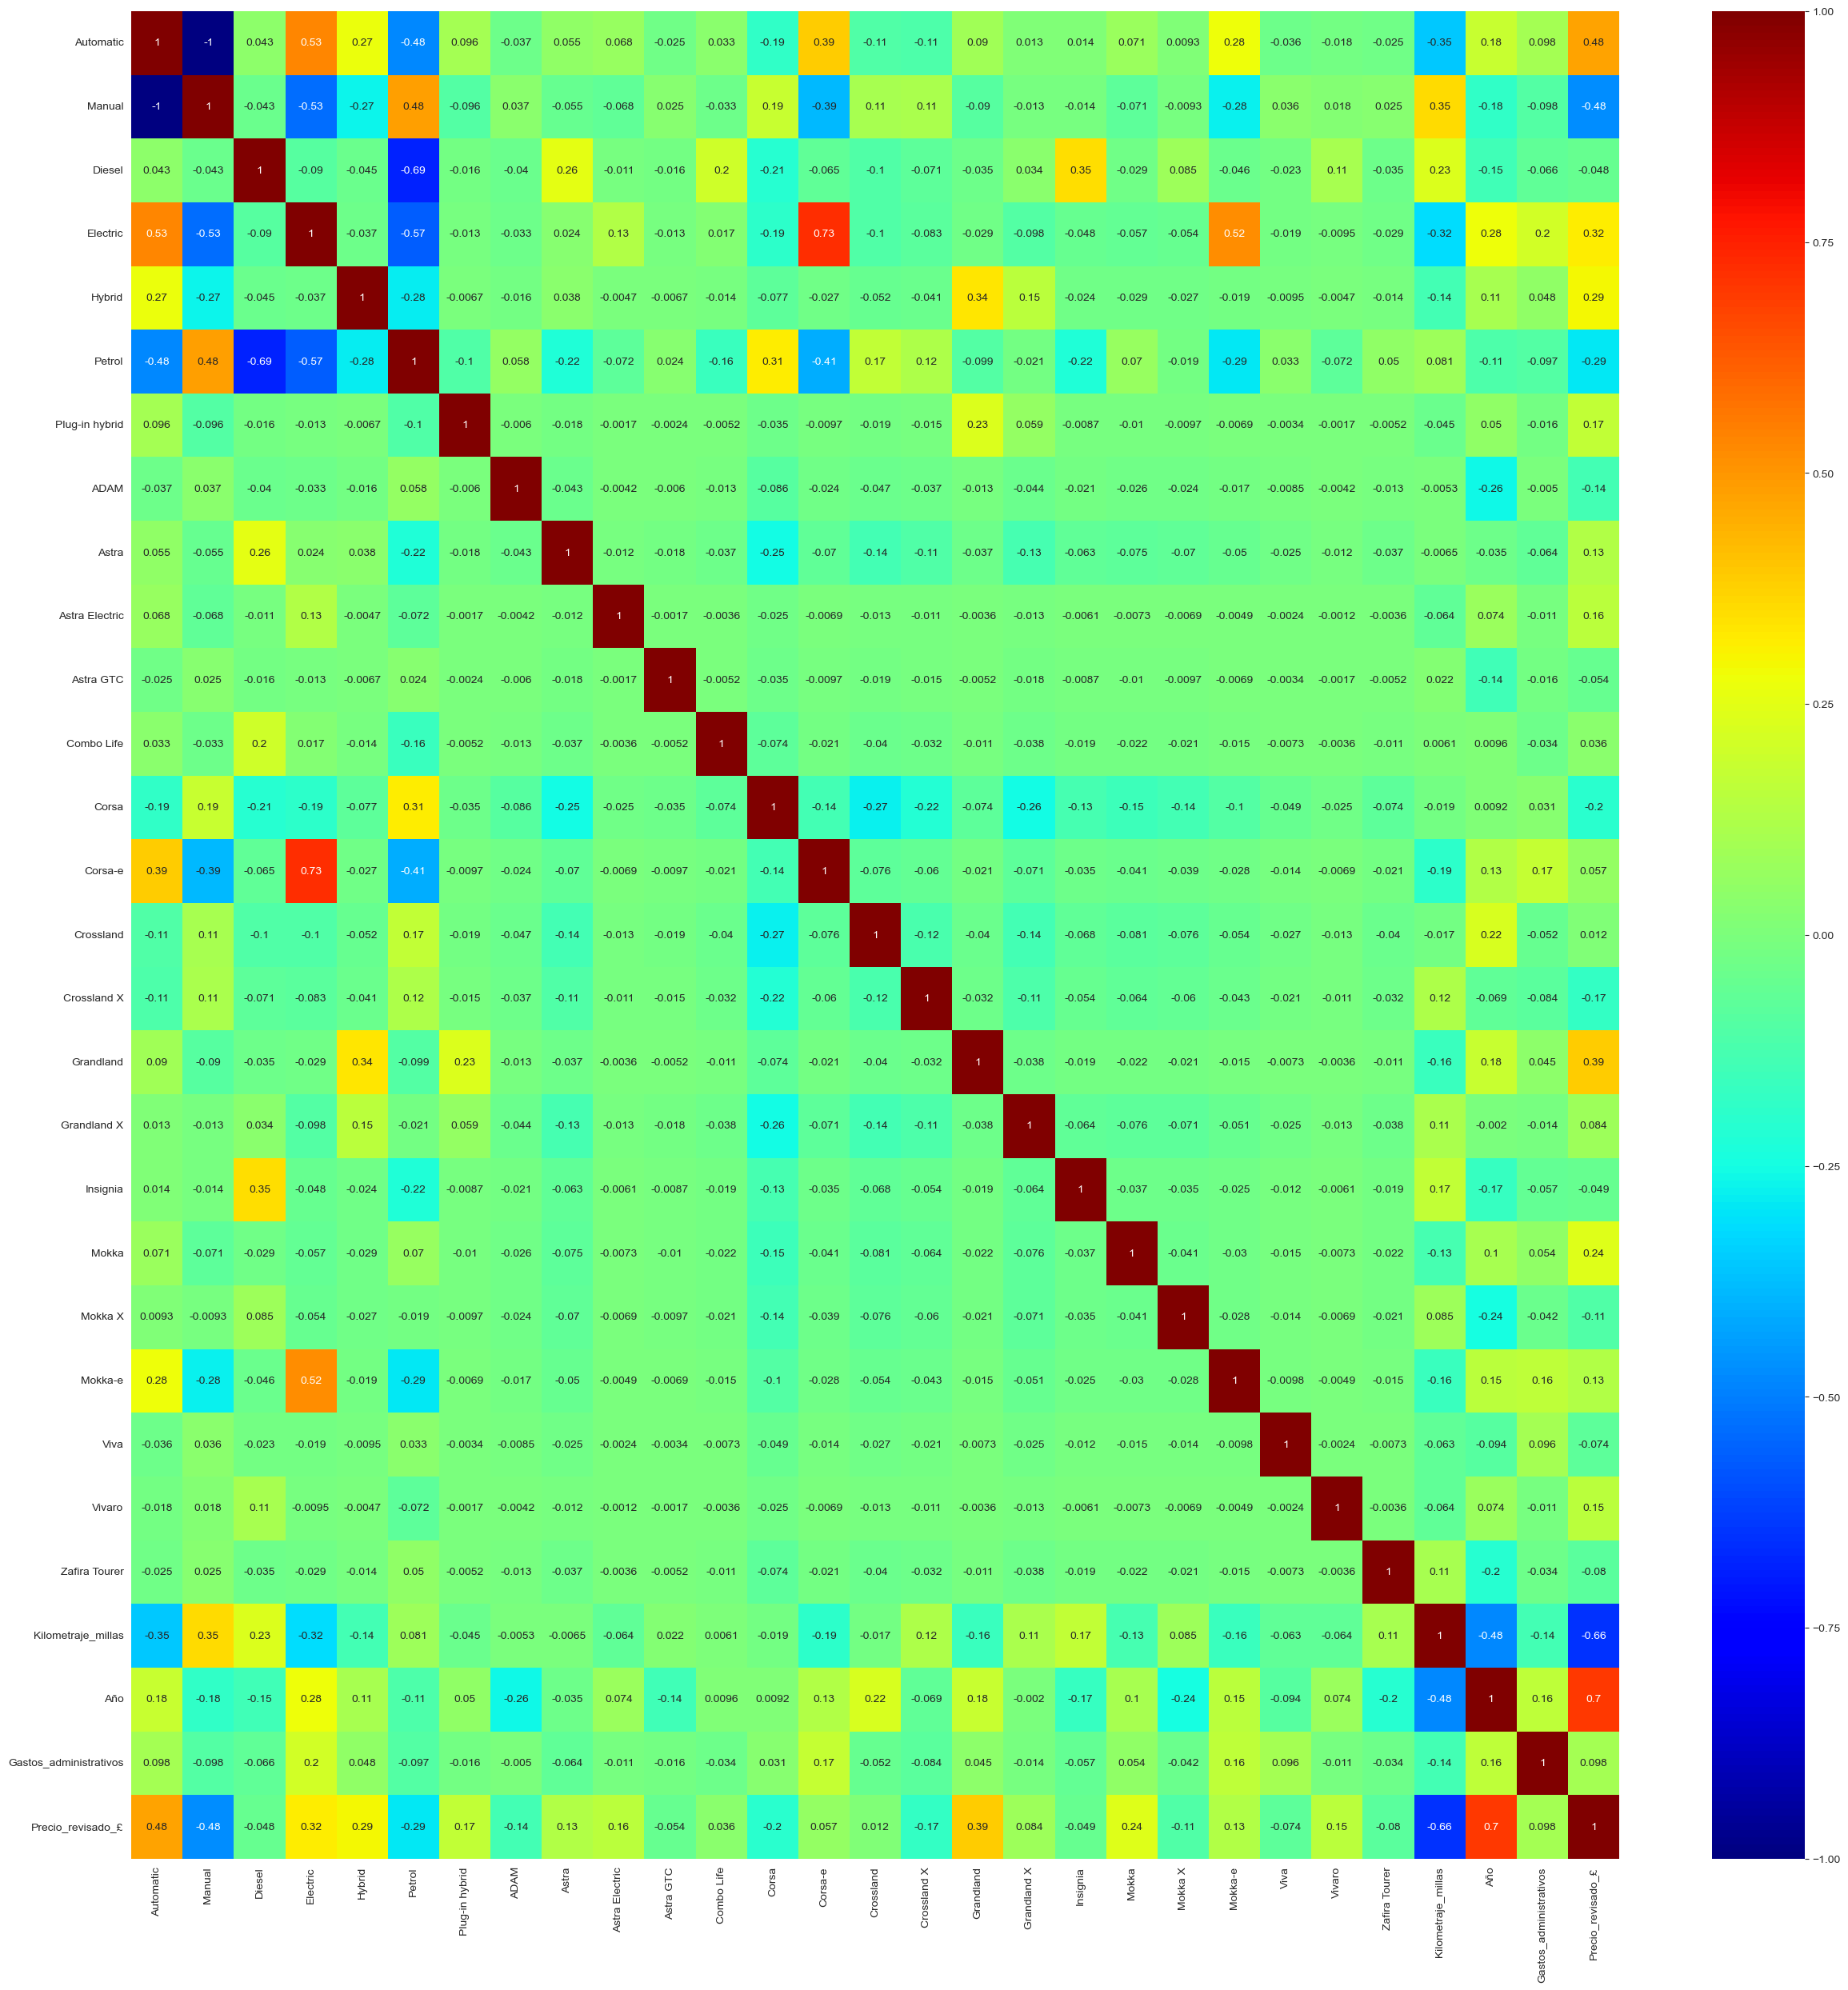

In [19]:
fig, ax = plt.subplots(figsize=(30,30))
corr = df_datos_resumen.corr()
sb.heatmap(corr, cmap="jet", center=0, vmin=-1, vmax=1, annot=True, ax=ax)

<Axes: >

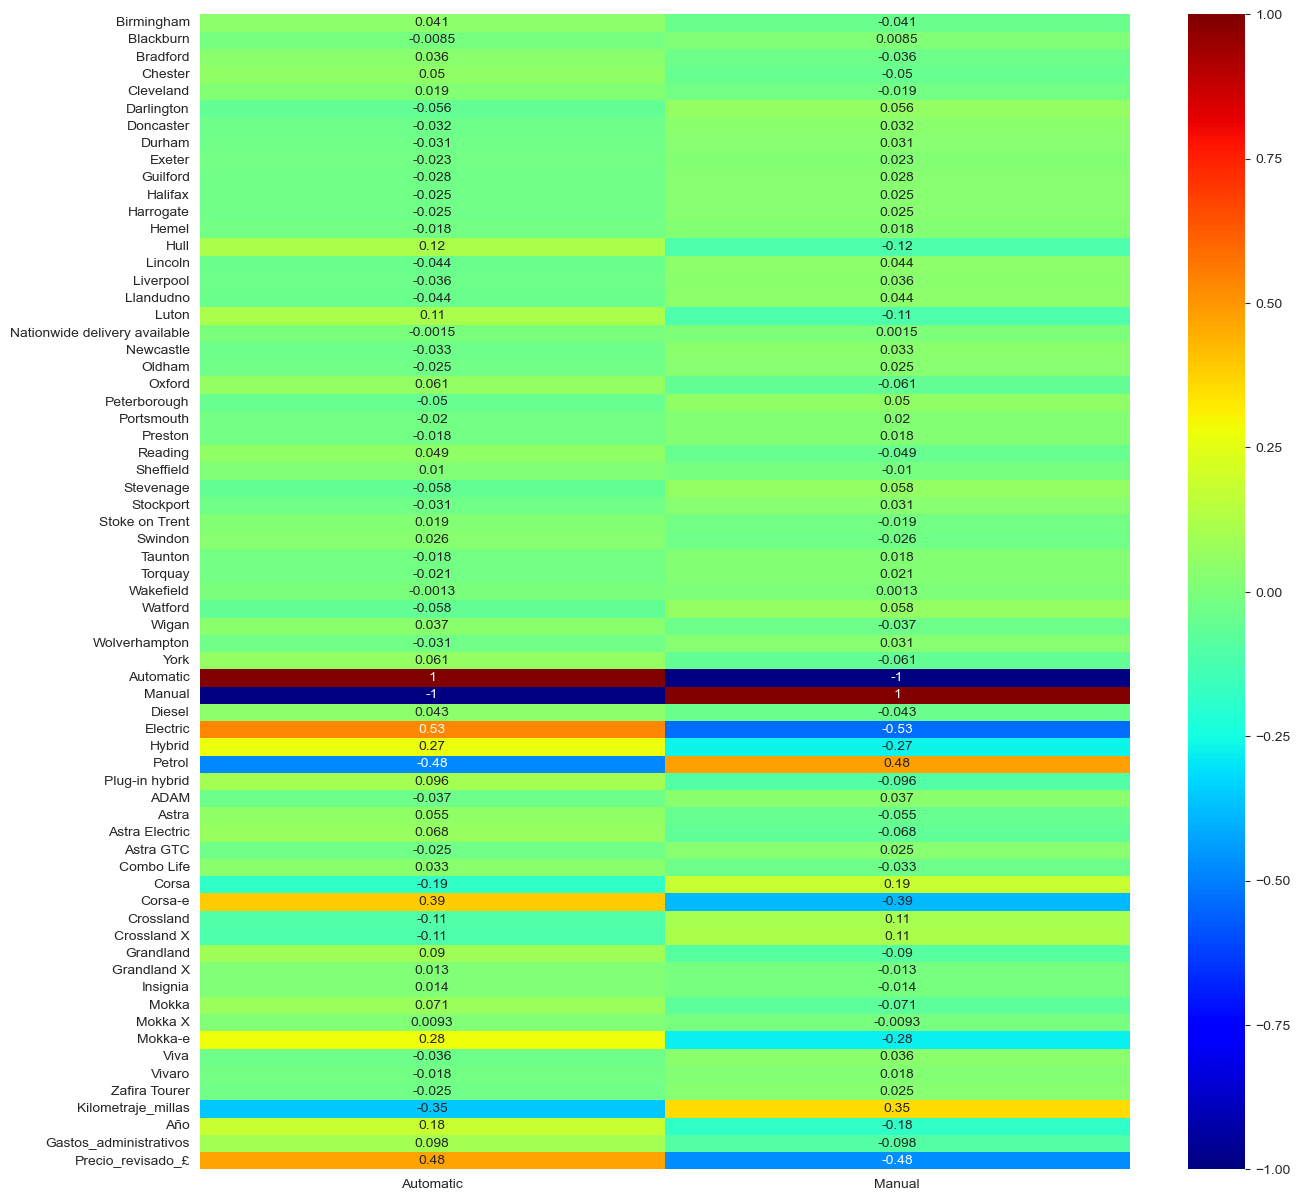

In [20]:
# Revisar variables con alta correlación 'Automatic', 'Manual'

# fig, ax = plt.subplots(figsize=(7,7))
fig, ax = plt.subplots(figsize=(15,15))

corr = df_datos.corr()
sb.heatmap(corr.loc[:, ['Automatic', 'Manual']], cmap="jet", center=0, vmin=-1, vmax=1, annot=True, ax=ax)

<Axes: >

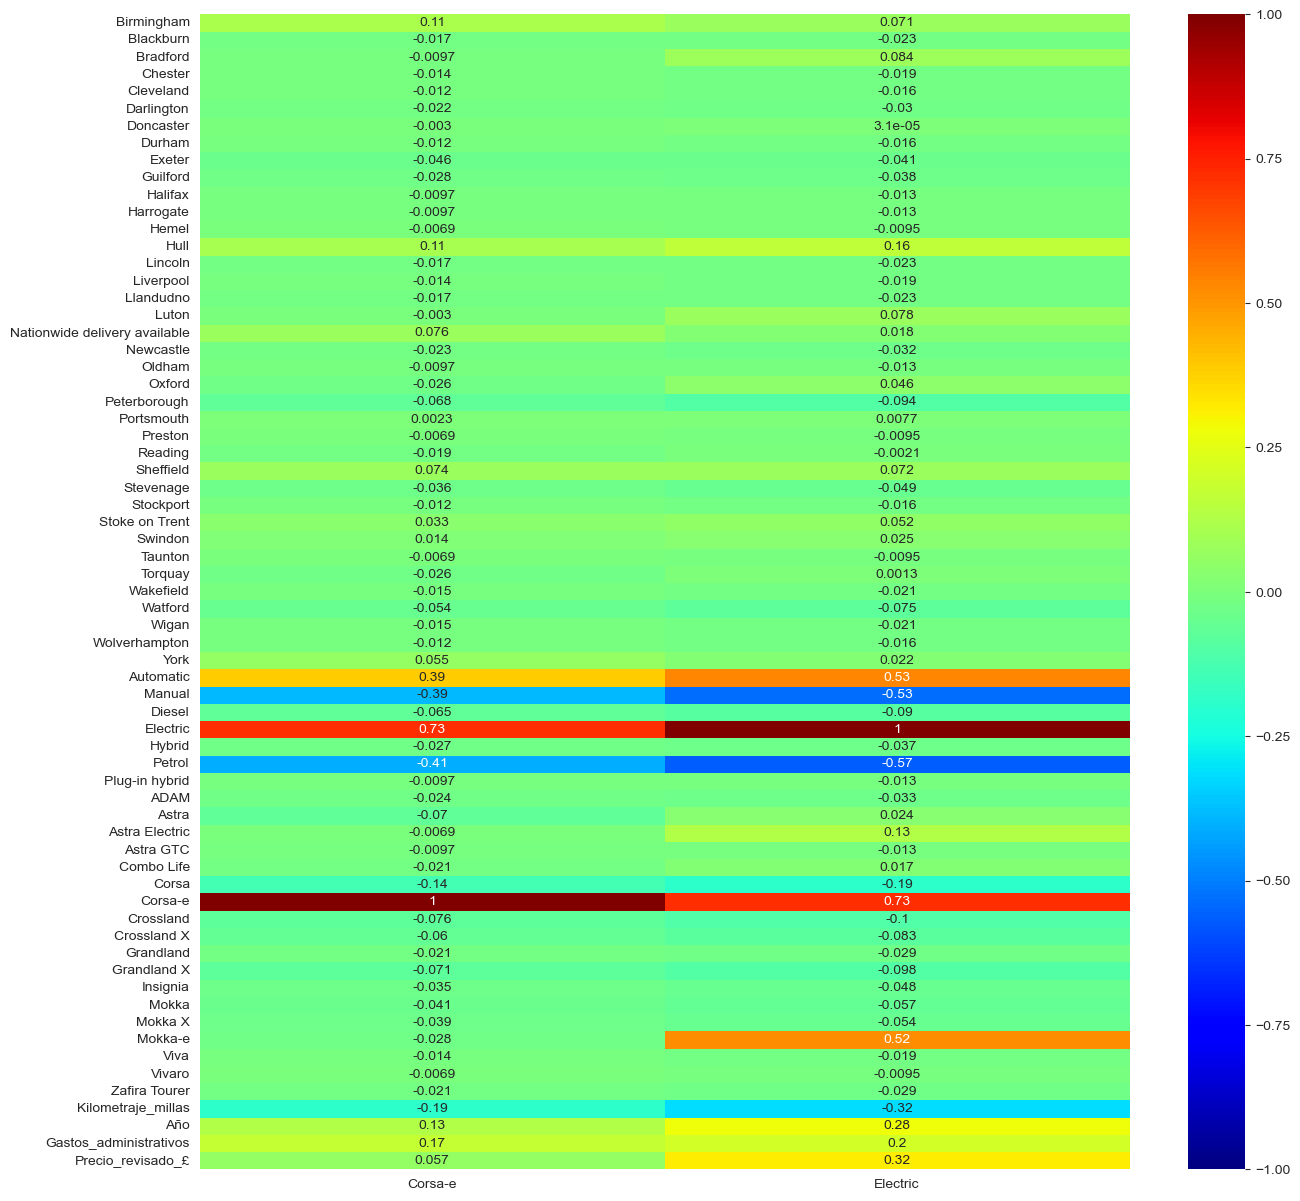

In [21]:
# Revisar variables con alta correlación 'Corsa-e', 'Electric'

# fig, ax = plt.subplots(figsize=(7,7))
fig, ax = plt.subplots(figsize=(15,15))

corr = df_datos.corr()
sb.heatmap(corr.loc[:, ['Corsa-e', 'Electric']], cmap="jet", center=0, vmin=-1, vmax=1, annot=True, ax=ax)

In [22]:
# Eliminar variables con alta correlación

df_datos.drop(columns=['Manual', 'Corsa-e'], axis = 1, inplace=True)

Se evalúa la significancia del coeficiente de correlación de Pearson mediante **f_regression** y se calcula una estimación de la información mutua entre cada característica y la variable objetivo mediante **mutual_info_regression**

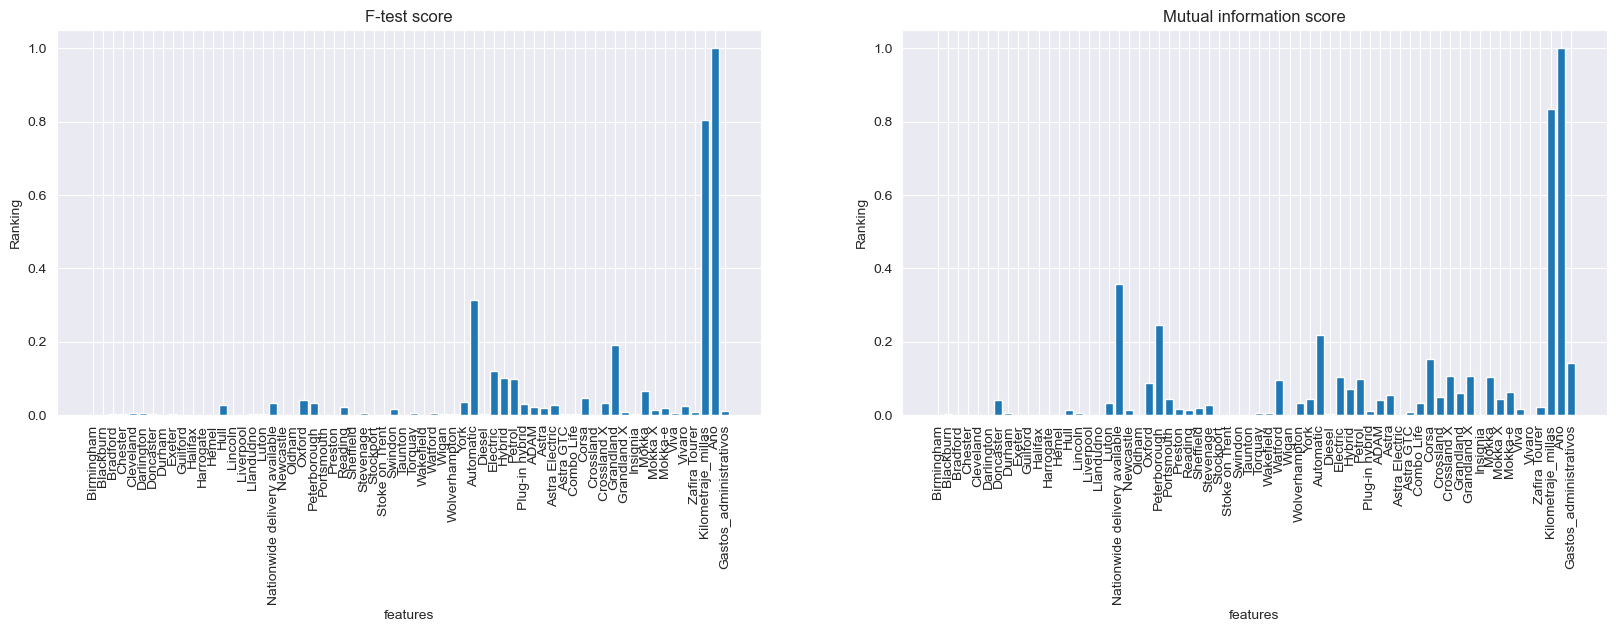

In [23]:

y = df_datos.values[:, -1]
X = df_datos.values[:, :-1]
feature_names = df_datos.columns[:-1]




# Cálculos F-test

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)


# Cálculos Mutual Information

mi = mutual_info_regression(X, y)
mi /= np.max(mi)



# Representación gráfica

plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]), f_test, align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('F-test score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]), mi, align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

# 5. Entrenamiento, test y validación de modelos

In [24]:
# Separar variables independientes y variable dependiente

y1 = df_datos.values[:, -1] 
X1 = df_datos.values[:, :-1]

In [25]:
# Dividir los datos entrenamiento, test

X_train, X_test, Y_train, Y_test = train_test_split(X1, y1, test_size=.25, random_state = 2)


print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

Datos entrenamiento:  (620, 64)
Datos test:  (207, 64)


# 5.1. LinearRegression

In [26]:

lr = LinearRegression()
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)


print('Coeficiente de determinación (R2): %0.5f' % r2_score(Y_test, y_pred_lr))
print('Raíz del Error Cuadrático Medio (RMSE): %0.5f' % mean_squared_error(Y_test, y_pred_lr, squared=False))
print('Error Porcentual Absoluto Medio (MAPE): %0.5f' % mean_absolute_percentage_error(Y_test, y_pred_lr))

Coeficiente de determinación (R2): 0.85769
Raíz del Error Cuadrático Medio (RMSE): 1203.48501
Error Porcentual Absoluto Medio (MAPE): 0.07378


In [27]:
# Escalado estandar

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5.2. Ridge

In [28]:

alpha_vector = np.logspace(-15, 1, 25)


param_grid = {'alpha': alpha_vector}


best_ridge, df_ridge = Optimizar_Hiperparametros(model=Ridge(random_state=10), parameters_grid=param_grid, 
                                                 n_folds=5, sc='neg_mean_squared_error', 
                                                 x_train=X_train_scaled, y_train=Y_train)

y_pred_ridge = Evaluacion_Modelo(best_ridge, X_train_scaled, X_test_scaled, Y_train, Y_test)

--------------------------------------------------------------------------------------
---------------------------- OPTIMIZACIÓN DE PARÁMETROS ------------------------------
--------------------------------------------------------------------------------------
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mejores parámetros: {'alpha': 2.154434690031878}
Tiempo de ejecución (min): 0.00680239200592041
--------------------------------------------------------------------------------------
------------------------------ EVALUACIÓN DEL MODELO ---------------------------------
--------------------------------------------------------------------------------------
Coeficiente de determinación (R2): 0.84873
Raíz del Error Cuadrático Medio (RMSE): 1240.76753
Error Porcentual Absoluto Medio (MAPE): 0.07702
Tiempo de ejecución (min): 0.0


# 5.3. SVR

In [29]:

vectorC = np.logspace(-3, 3, 5)
vector_epsilon = np.logspace(-3, 3, 4)
vector_kernel = ['linear', 'poly', 'rbf', 'sigmoid']


param_grid = {'C': vectorC, 'epsilon': vector_epsilon, 'kernel': vector_kernel}


best_svr, df_svr = Optimizar_Hiperparametros(model=SVR(), parameters_grid=param_grid, 
                                             n_folds=5, sc='neg_mean_squared_error', 
                                             x_train=X_train_scaled, y_train=Y_train)

y_pred_svr = Evaluacion_Modelo(best_svr, X_train_scaled, X_test_scaled, Y_train, Y_test)

--------------------------------------------------------------------------------------
---------------------------- OPTIMIZACIÓN DE PARÁMETROS ------------------------------
--------------------------------------------------------------------------------------
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Mejores parámetros: {'C': 1000.0, 'epsilon': 1000.0, 'kernel': 'linear'}
Tiempo de ejecución (min): 0.2723938902219137
--------------------------------------------------------------------------------------
------------------------------ EVALUACIÓN DEL MODELO ---------------------------------
--------------------------------------------------------------------------------------
Coeficiente de determinación (R2): 0.84624
Raíz del Error Cuadrático Medio (RMSE): 1250.94263
Error Porcentual Absoluto Medio (MAPE): 0.07676
Tiempo de ejecución (min): 0.0010416825612386067


# 5.4. DecisionTreeRegressor

In [30]:

max_depth_arr = range(1, 20+1)


param_grid = {'max_depth': max_depth_arr}


best_dt, df_dt = Optimizar_Hiperparametros(model=DecisionTreeRegressor(random_state=0), 
                                           parameters_grid=param_grid, n_folds=5, sc='neg_mean_squared_error', 
                                           x_train=X_train_scaled, y_train=Y_train)

y_pred_dt = Evaluacion_Modelo(best_dt, X_train_scaled, X_test_scaled, Y_train, Y_test)

--------------------------------------------------------------------------------------
---------------------------- OPTIMIZACIÓN DE PARÁMETROS ------------------------------
--------------------------------------------------------------------------------------
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros: {'max_depth': 16}
Tiempo de ejecución (min): 0.011011668046315511
--------------------------------------------------------------------------------------
------------------------------ EVALUACIÓN DEL MODELO ---------------------------------
--------------------------------------------------------------------------------------
Coeficiente de determinación (R2): 0.77646
Raíz del Error Cuadrático Medio (RMSE): 1508.33862
Error Porcentual Absoluto Medio (MAPE): 0.08290
Tiempo de ejecución (min): 0.0


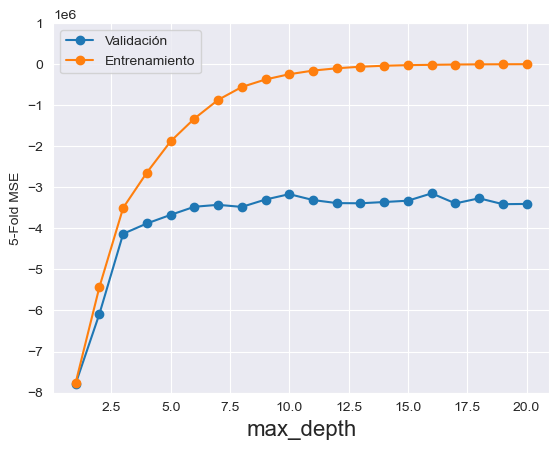

In [31]:
# Evaluación de MSE en entrenamiento y validación respecto a max_depth

scores_test = np.array(df_dt['mean_test_score'])
scores_train = np.array(df_dt['mean_train_score'])
plt.plot(max_depth_arr, scores_test, '-o', label='Validación')
plt.plot(max_depth_arr, scores_train, '-o', label='Entrenamiento')
plt.xlabel('max_depth', fontsize=16)
plt.ylabel('5-Fold MSE')
plt.legend()
plt.ylim((-8e6, 1e6))
plt.show()

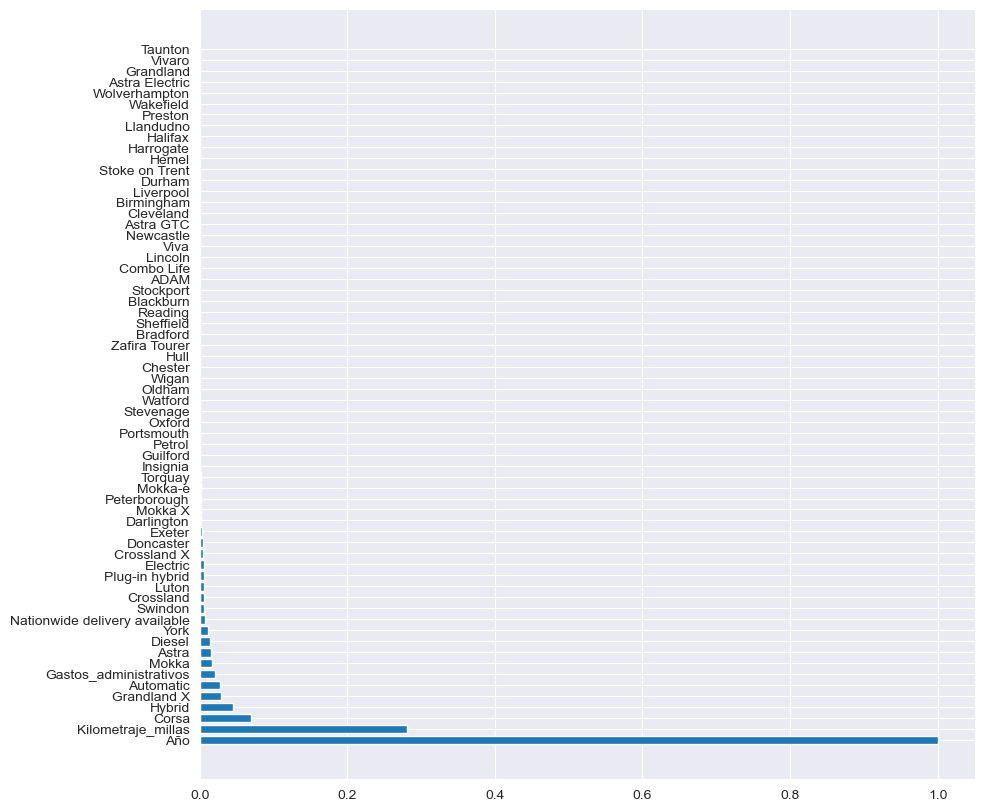

In [32]:
# Importancia de las variables

importances = best_dt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 10))
plt.barh(range(X_train.shape[1]), importances[indices])
plt.yticks(range(X_train.shape[1]), feature_names[indices])
plt.show()

# 5.5. GradientBoostingRegressor

In [33]:

Niterations = [500, 1000, 1500]
learningRate = [0.1, 0.05, 0.01]

param_grid = {'n_estimators': Niterations, 'learning_rate': learningRate}



best_gb, df_gb = Optimizar_Hiperparametros(model=GradientBoostingRegressor(random_state=0, max_depth=3), 
                                           parameters_grid=param_grid, n_folds=5, sc='neg_mean_squared_error', 
                                           x_train=X_train_scaled, y_train=Y_train)

y_pred_gb = Evaluacion_Modelo(best_gb, X_train_scaled, X_test_scaled, Y_train, Y_test)

--------------------------------------------------------------------------------------
---------------------------- OPTIMIZACIÓN DE PARÁMETROS ------------------------------
--------------------------------------------------------------------------------------
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mejores parámetros: {'learning_rate': 0.05, 'n_estimators': 1000}
Tiempo de ejecución (min): 1.2290431380271911
--------------------------------------------------------------------------------------
------------------------------ EVALUACIÓN DEL MODELO ---------------------------------
--------------------------------------------------------------------------------------
Coeficiente de determinación (R2): 0.89263
Raíz del Error Cuadrático Medio (RMSE): 1045.33210
Error Porcentual Absoluto Medio (MAPE): 0.06122
Tiempo de ejecución (min): 0.030574504534403482


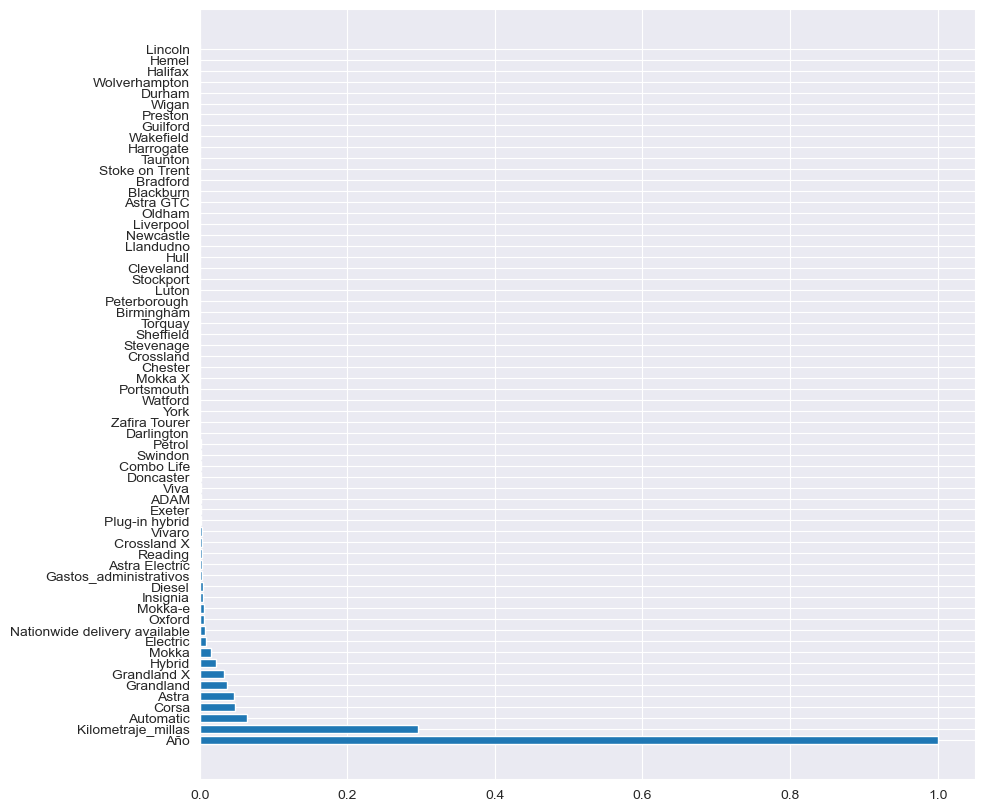

In [34]:
# Importancia de las variables

importances = best_gb.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 10))
plt.barh(range(X_train.shape[1]), importances[indices])
plt.yticks(range(X_train.shape[1]), feature_names[indices])
plt.show()

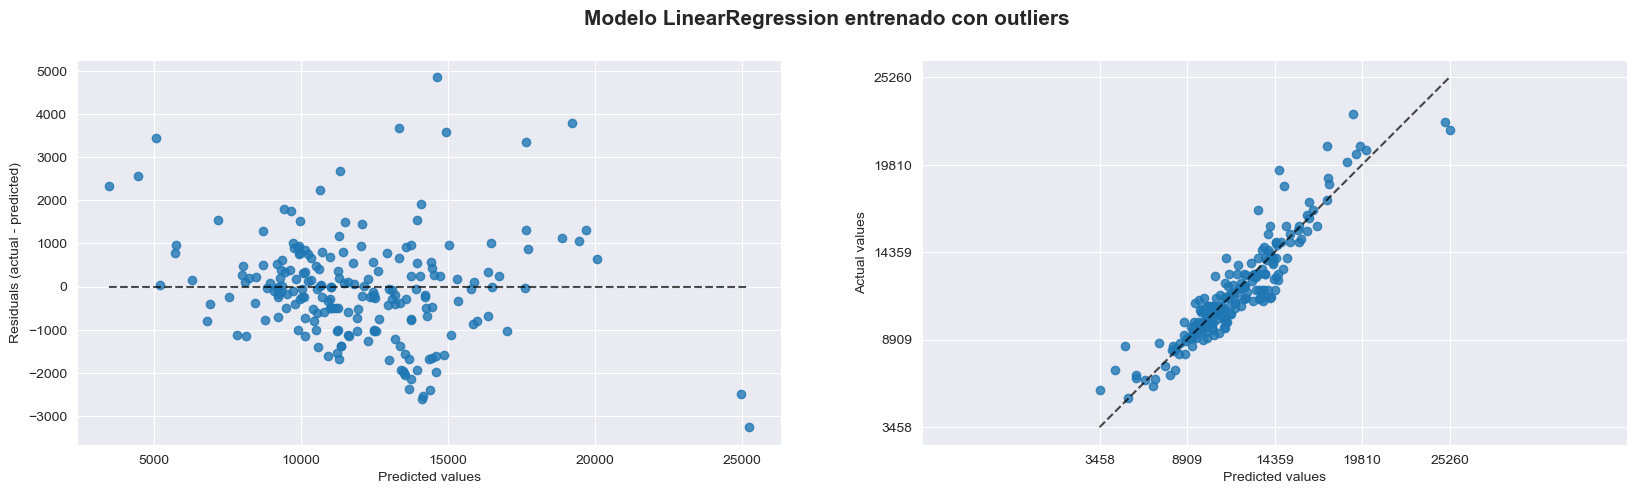

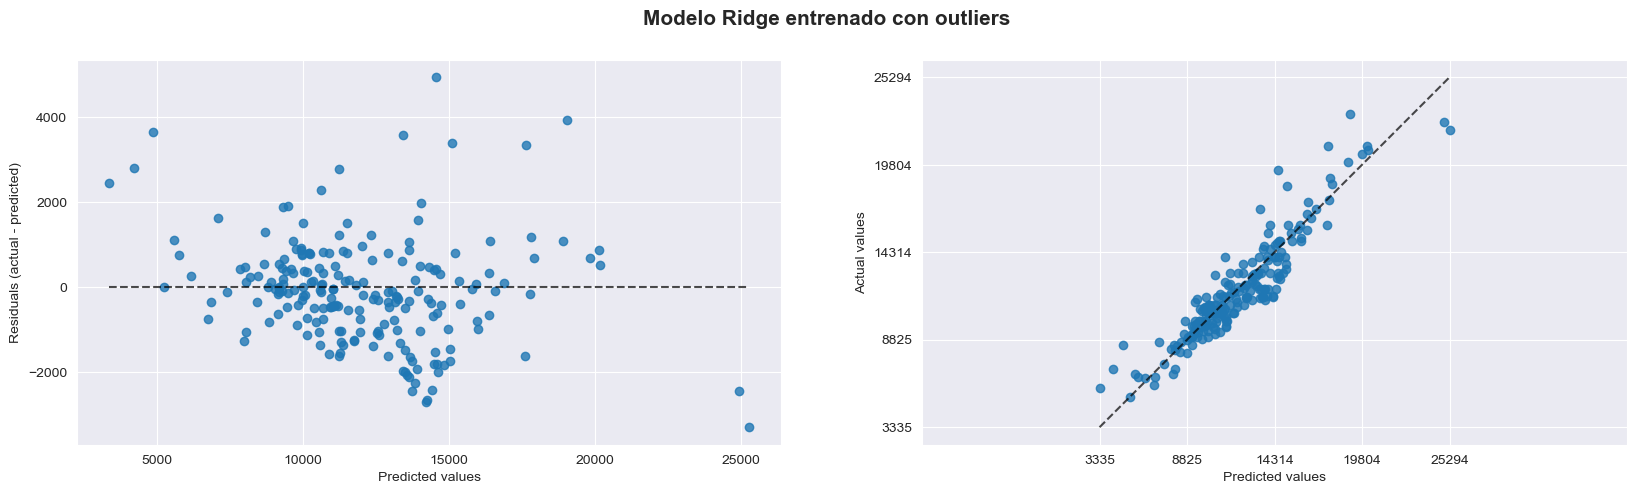

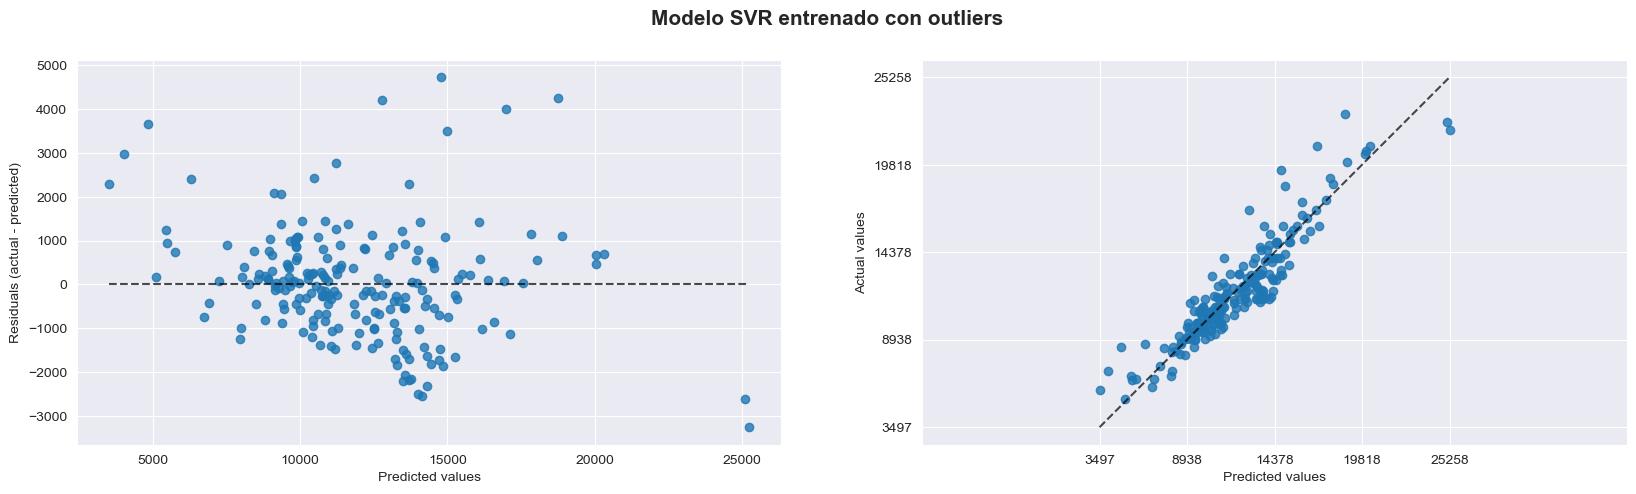

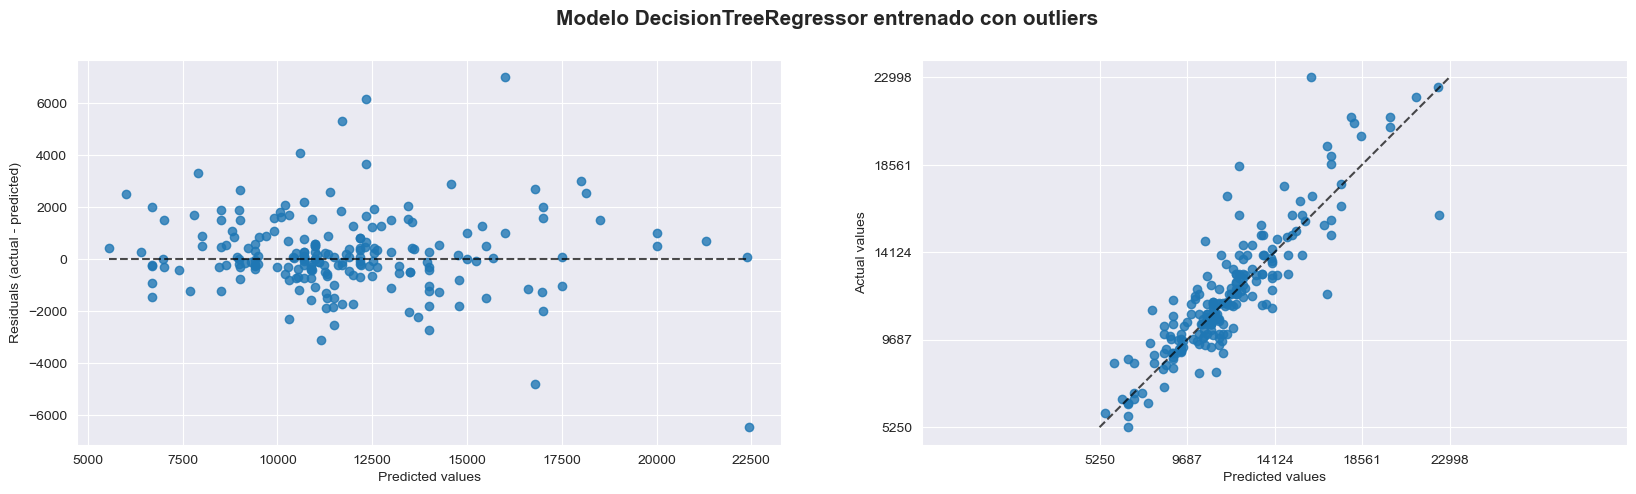

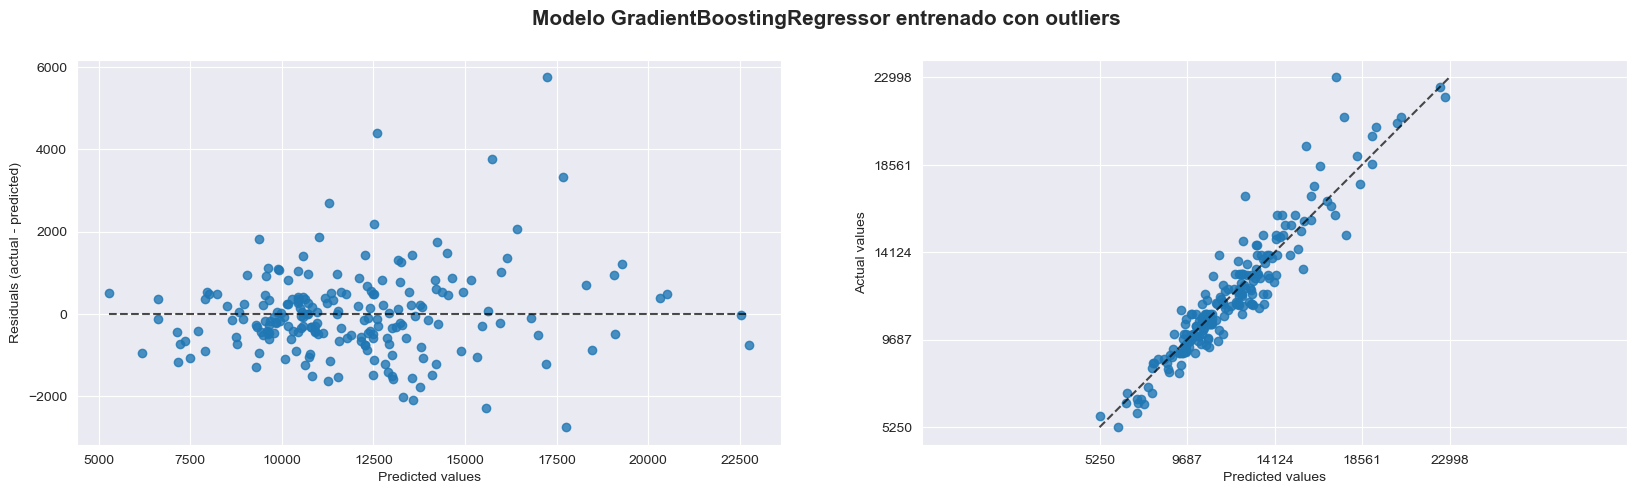

In [35]:
# Representación de residuos

Representar_Resultados(Y_test, y_pred_lr, lr, tipo_datos)
Representar_Resultados(Y_test, y_pred_ridge, best_ridge, tipo_datos)
Representar_Resultados(Y_test, y_pred_svr, best_svr, tipo_datos)
Representar_Resultados(Y_test, y_pred_dt, best_dt, tipo_datos)
Representar_Resultados(Y_test, y_pred_gb, best_gb, tipo_datos)

Se calcula la importancia de los coeficientes de regresión para **Linear Regression**, **Ridge** y **SVR**

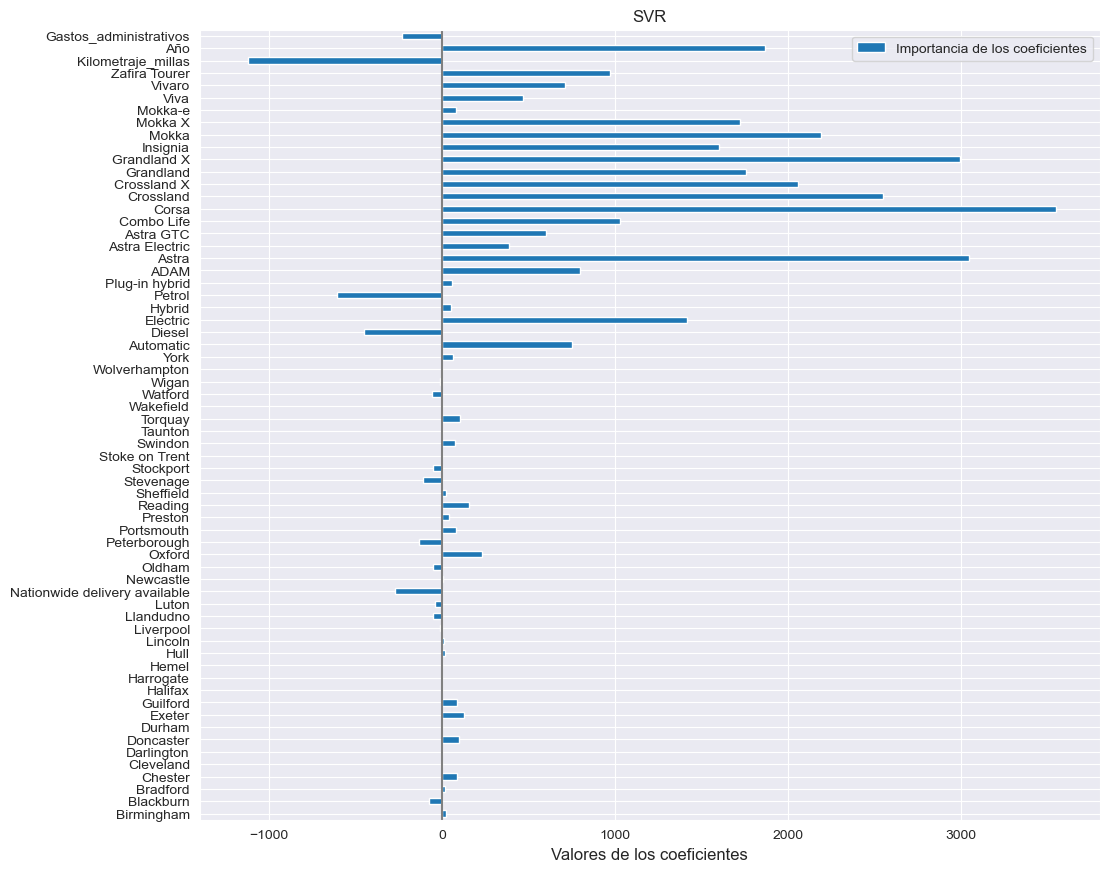

In [36]:
nombre_carateristicas = df_datos.columns[:-1]

best_svr_coefficients = best_svr.coef_.reshape(len(df_datos.columns[:-1]),)

coefs = pd.DataFrame(
#     lr.coef_,
#     best_ridge.coef_,
    best_svr_coefficients,
    columns=['Importancia de los coeficientes'],
    index=nombre_carateristicas,
)


coefs.plot.barh(figsize=(15, 10))

# plt.title('Linear Regression', fontsize = 12)
# plt.title('Ridge', fontsize = 12)
plt.title('SVR', fontsize = 12)
plt.subplots_adjust(top = 0.9)
plt.xlabel('Valores de los coeficientes', fontsize = 12)

# Límites eje y Linear Regression
# plt.xlim(-4000, 22000)

# Límites eje y Ridge
# plt.xlim(-1400, 3600)

# Límites eje y SVR
plt.xlim(-1400, 3800)

plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Se validan los modelos con nuevos datos, se guardan los resultados en un dataframe y se representan los resultados.

--------------------------------------------------------------------------------------
------------------------------ EVALUACIÓN DEL MODELO ---------------------------------
--------------------------------------------------------------------------------------
Coeficiente de determinación (R2): 0.60159
Raíz del Error Cuadrático Medio (RMSE): 2515.03730
Error Porcentual Absoluto Medio (MAPE): 0.10699
Tiempo de ejecución (min): 0.00013563235600789388


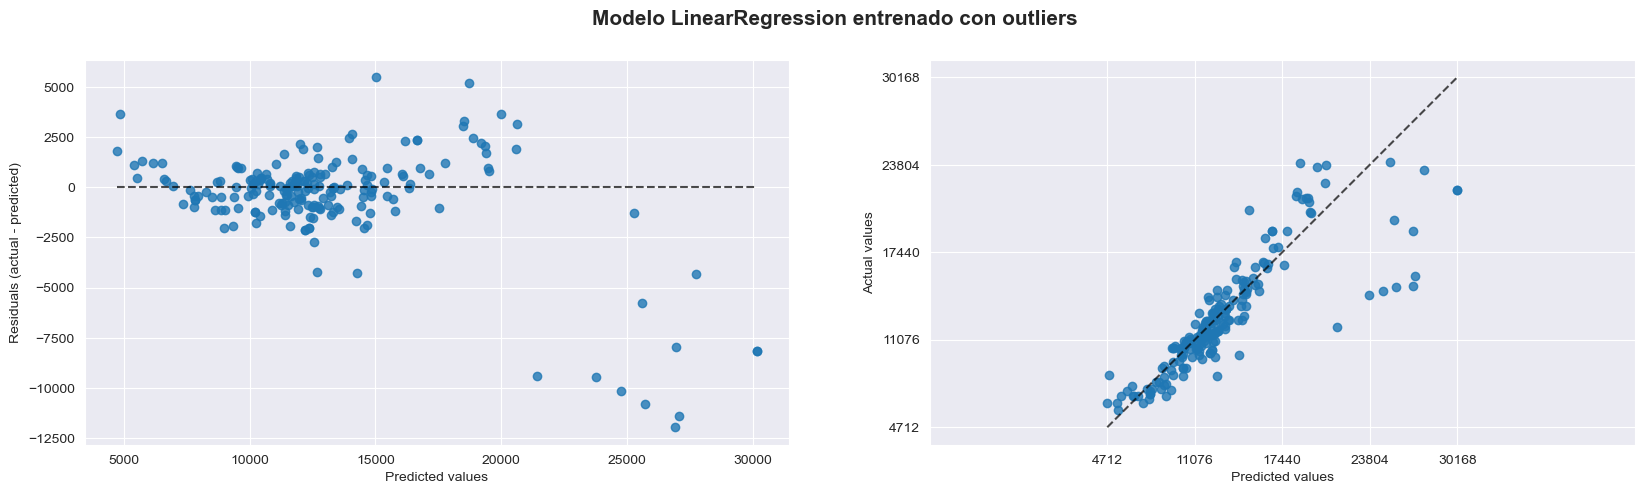

In [37]:

# Escalado estandar datos test

x_test = df_cars_test.values[:, :-1]

x_test_scaled = scaler.transform(x_test)

y_test = df_cars_test.values[:, -1]


# Evaluación y representación de resultados LinearRegression

y_pred = Evaluacion_Modelo(lr, X_train, x_test, Y_train, y_test)
df_cars_test['LinearRegression'] = y_pred
Representar_Resultados(y_test, y_pred, lr, tipo_datos)

--------------------------------------------------------------------------------------
------------------------------ EVALUACIÓN DEL MODELO ---------------------------------
--------------------------------------------------------------------------------------
Coeficiente de determinación (R2): 0.70172
Raíz del Error Cuadrático Medio (RMSE): 2176.16321
Error Porcentual Absoluto Medio (MAPE): 0.10240
Tiempo de ejecución (min): 9.28203264872233e-05
--------------------------------------------------------------------------------------
------------------------------ EVALUACIÓN DEL MODELO ---------------------------------
--------------------------------------------------------------------------------------
Coeficiente de determinación (R2): 0.67186
Raíz del Error Cuadrático Medio (RMSE): 2282.48340
Error Porcentual Absoluto Medio (MAPE): 0.10541
Tiempo de ejecución (min): 0.0009177684783935547
--------------------------------------------------------------------------------------
----------

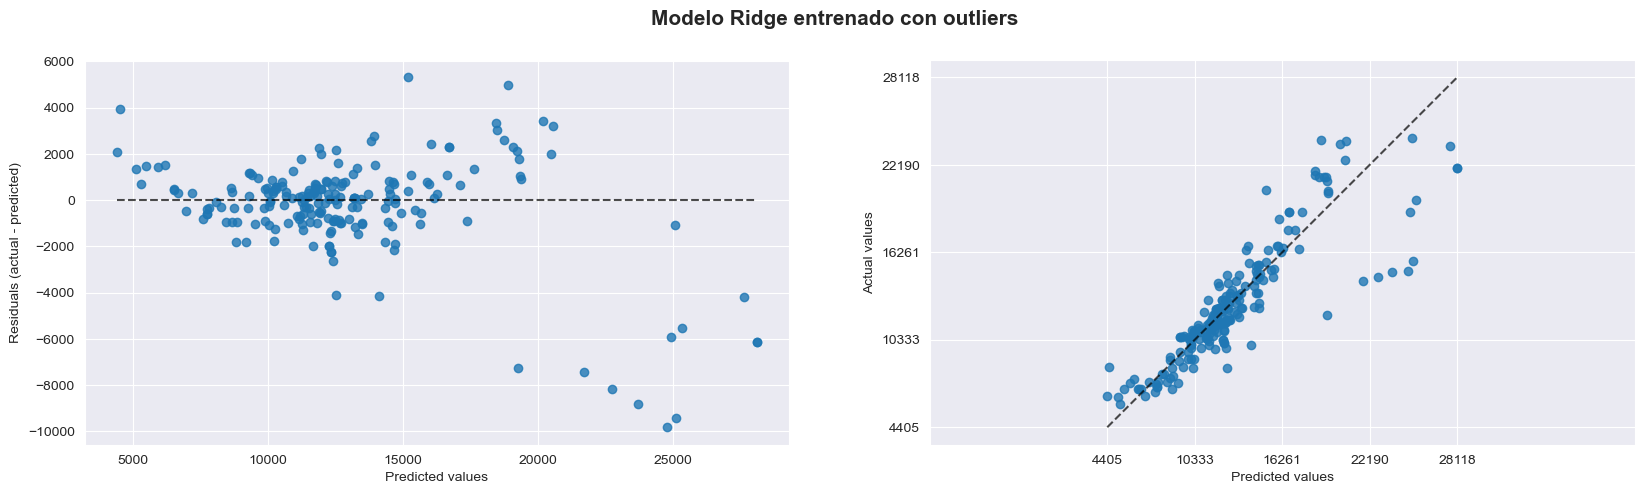

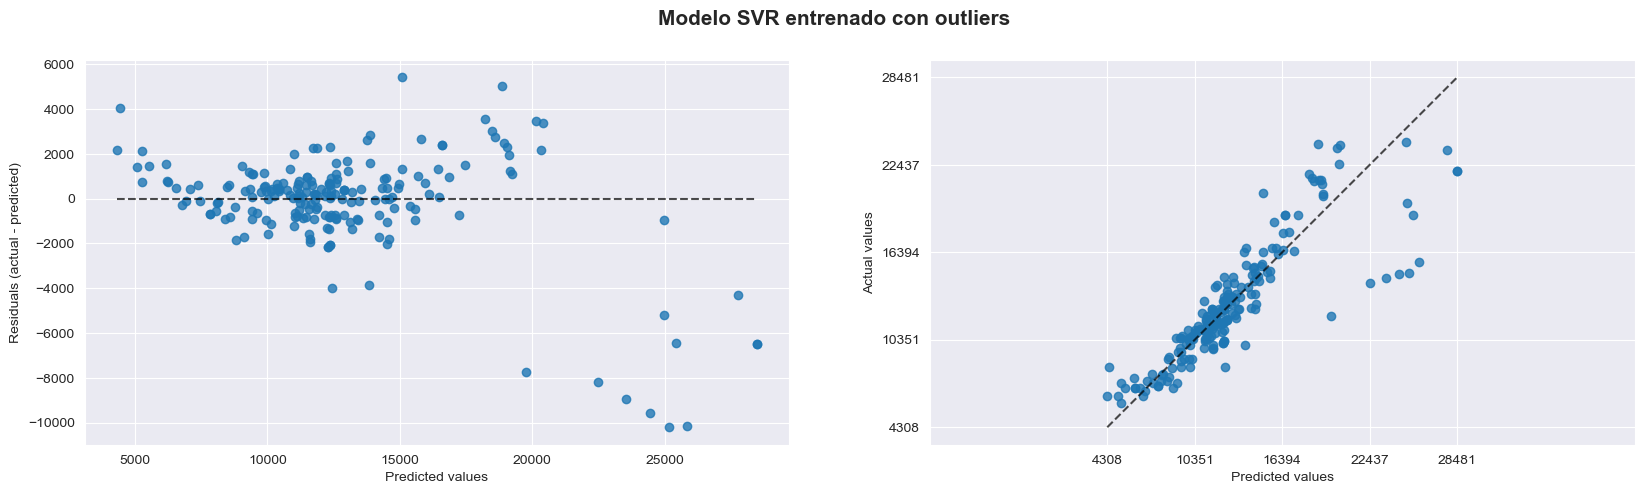

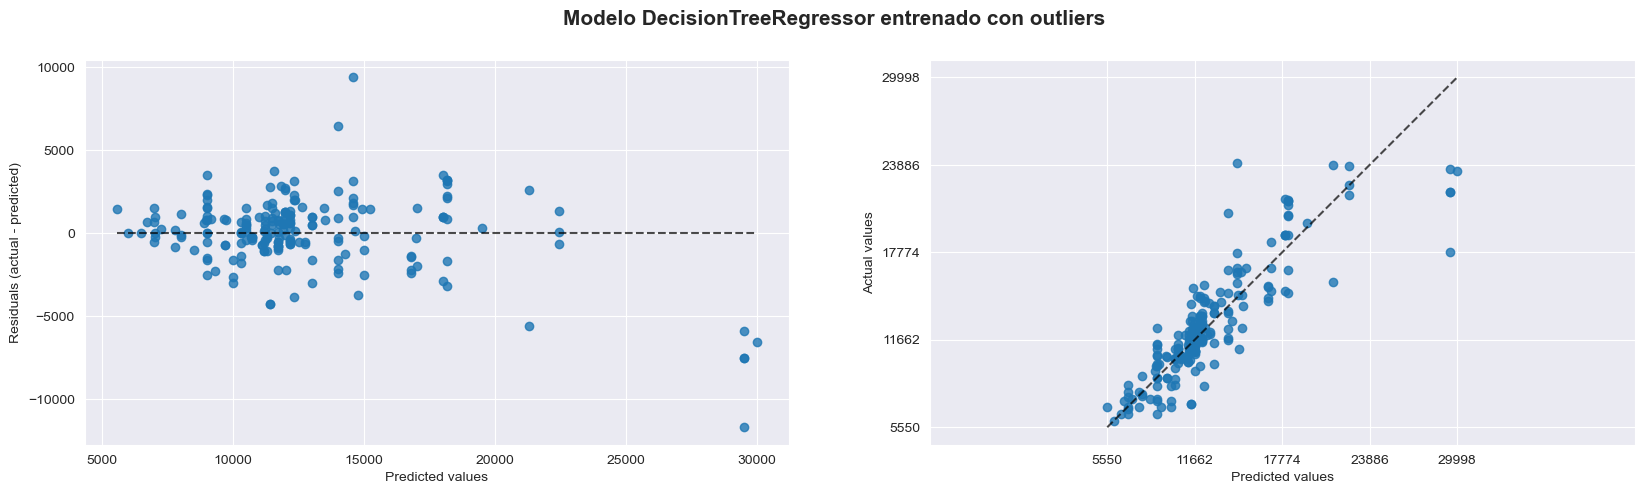

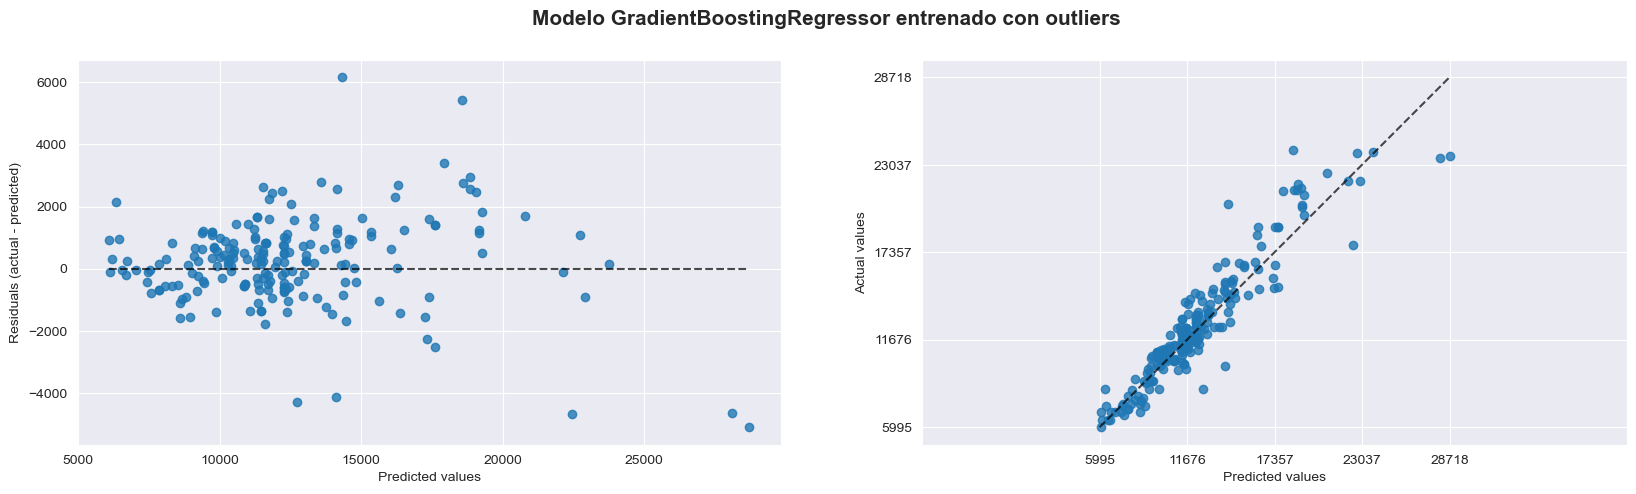

In [38]:
# Evaluación y representación de resultados resto de modelos

modelos = [best_ridge, best_svr, best_dt, best_gb]

for modelo in modelos:
    y_pred = Evaluacion_Modelo(modelo, X_train_scaled, x_test_scaled, Y_train, y_test)
    nombre_modelo = str(type(modelo))[:-2].split('.')[-1]
    df_cars_test[nombre_modelo] = y_pred
    Representar_Resultados(y_test, y_pred, modelo, tipo_datos)

In [39]:
df_cars_test

Birmingham           Blackburn           Bradford            \
0                      0                   0                   0   
1                      0                   0                   0   
2                      0                   0                   0   
3                      0                   0                   0   
4                      0                   0                   0   
..                   ...                 ...                 ...   
196                    0                   0                   0   
197                    0                   0                   0   
198                    0                   0                   0   
199                    0                   0                   0   
200                    0                   0                   0   

     Chester             Cleveland           Darlington          \
0                     0                   0                   0   
1                     0                   0                   0   
2                     0                   0                   0   
3                     0                   0                   0   
4                     0                   0                   0   
..                  ...                 ...                 ...   
196                   0                   0                   0   
197                   0                   0                   0   
198                   0                   0                   0   
199                   0                   0                   0   
200                   0                   0                   0   

     Doncaster           Durham              Exeter              \
0                     0                   0                   0   
1                     0                   0                   0   
2                     0                   0                   0   
3                     0                   0                   0   
4                     0                   0                   0   
..                  ...                 ...                 ...   
196                   0                   0                   0   
197                   0                   0                   0   
198                   0                   0                   0   
199                   0                   0                   0   
200                   0                   0                   0   

     Guilford            ...  Zafira Tourer  Kilometraje_millas   Año  \
0                     0  ...              0               17000  2020   
1                     0  ...              1               57800  2016   
2                     0  ...              1               62300  2018   
3                     0  ...              1               59100  2018   
4                     0  ...              1                3400  2017   
..                  ...  ...            ...                 ...   ...   
196                   0  ...              0               17700  2020   
197                   0  ...              0               15300  2021   
198                   0  ...              0               14800  2021   
199                   0  ...              0               35500  2021   
200                   0  ...              0               14600  2020   

     Gastos_administrativos  Precio_revisado_£  LinearRegression  \
0                         0              11757      11697.695528   
1                         0               7995       8251.930899   
2                         0               9495       9944.028008   
3                         0               9795      10138.907582   
4                         0               9795      12547.956904   
..                      ...                ...               ...   
196                       0              12995      13207.752653   
197                       0              13295      12784.298556   
198                       0              13495      12814.748490   
199                  

# 6. Condiciones para la validación de modelos de regresión

In [40]:
# Errores de los modelos

error_lm = Y_test - y_pred_lr


error_ridge = Y_test - y_pred_ridge


error_svr = Y_test - y_pred_svr


error_dt = Y_test - y_pred_dt


error_gb = Y_test - y_pred_gb

# 6.1. Linealidad


In [41]:
print('Prueba linealidad LinearRegression: ', error_lm.mean())
print('Prueba linealidad Ridge: ', error_ridge.mean())
print('Prueba linealidad SVR: ', error_svr.mean())
print('Prueba linealidad DecisionTreeRegressor: ', error_dt.mean())
print('Prueba linealidad GradientBoostingRegressor: ', error_gb.mean())

Prueba linealidad LinearRegression:  -50.912542553871624
Prueba linealidad Ridge:  -78.85864457563596
Prueba linealidad SVR:  23.176388468040184
Prueba linealidad DecisionTreeRegressor:  197.57803790412484
Prueba linealidad GradientBoostingRegressor:  -10.183013305907211


# 6.2. Normalidad

In [42]:
# Prueba de Shapiro-Wilk

print('Normalidad de los residuos LinearRegression: ', stats.shapiro(error_lm))
print('Normalidad de los residuos Ridge: ', stats.shapiro(error_ridge))
print('Normalidad de los residuos SVR: ', stats.shapiro(error_svr))
print('Normalidad de los residuos DecisionTreeRegressor: ', stats.shapiro(error_dt))
print('Normalidad de los residuos GradientBoostingRegressor: ', stats.shapiro(error_gb))

Normalidad de los residuos LinearRegression:  ShapiroResult(statistic=0.956662118434906, pvalue=6.183796358527616e-06)
Normalidad de los residuos Ridge:  ShapiroResult(statistic=0.9584875106811523, pvalue=9.694095751910936e-06)
Normalidad de los residuos SVR:  ShapiroResult(statistic=0.9513954520225525, pvalue=1.7816887520893943e-06)
Normalidad de los residuos DecisionTreeRegressor:  ShapiroResult(statistic=0.9171047210693359, pvalue=2.234625151587011e-09)
Normalidad de los residuos GradientBoostingRegressor:  ShapiroResult(statistic=0.9081659913063049, pvalue=5.242526968096684e-10)


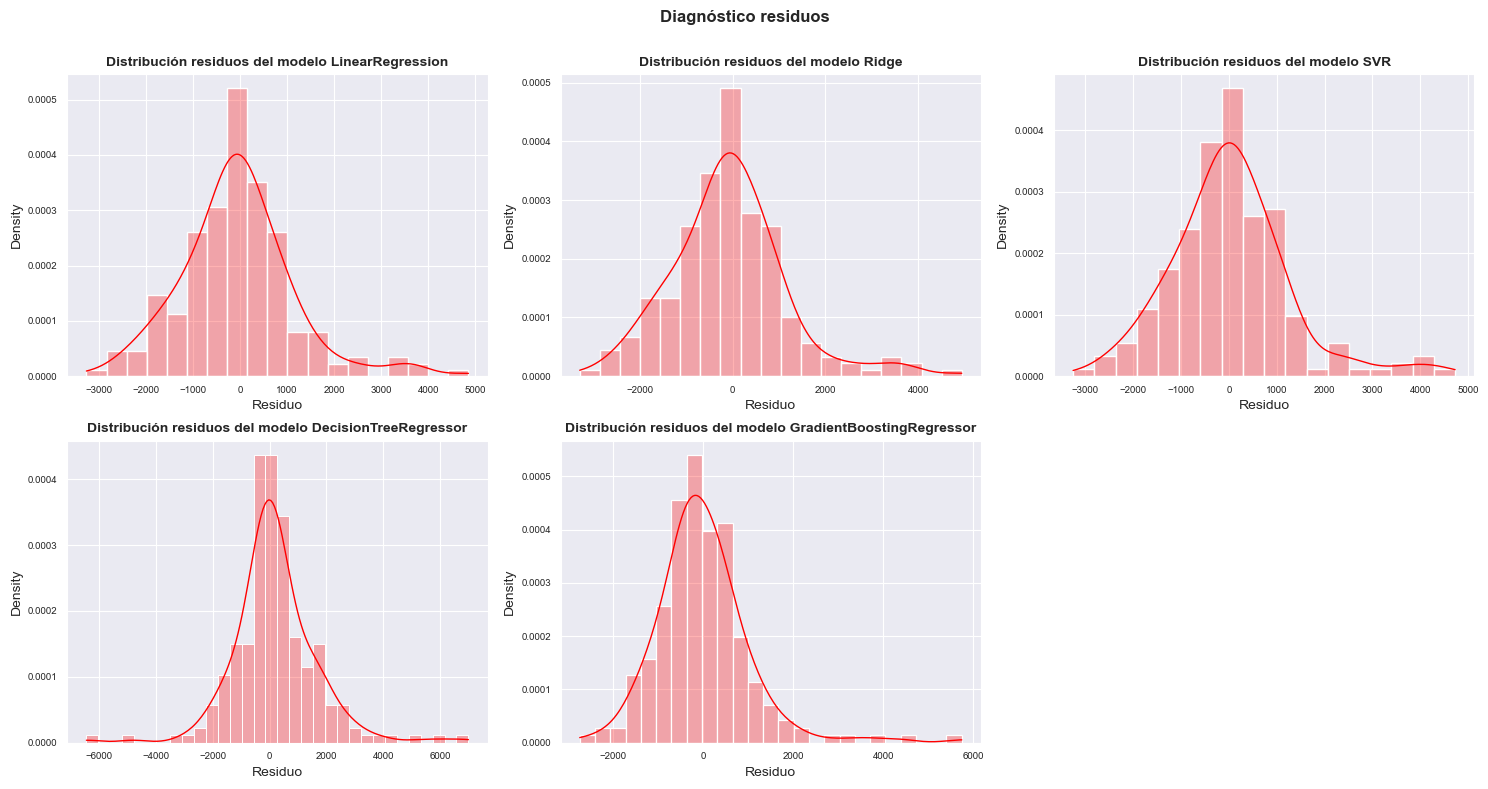

In [43]:
# Histogramas

fig, axes = plt.subplots(2, 3, figsize=(15,8))

sb.histplot(
    data    = error_lm,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
#     color   = "firebrick",
    color   = "r",
    alpha   = 0.3,
    ax      = axes[0, 0]
)

axes[0, 0].set_title('Distribución residuos del modelo LinearRegression', fontsize = 10,
                     fontweight = "bold")
axes[0, 0].set_xlabel("Residuo")
axes[0, 0].tick_params(labelsize = 7)


sb.histplot(
    data    = error_ridge,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
#     color   = "firebrick",
    color   = "r",
    alpha   = 0.3,
    ax      = axes[0, 1]
)

axes[0, 1].set_title('Distribución residuos del modelo Ridge', fontsize = 10,
                     fontweight = "bold")
axes[0, 1].set_xlabel("Residuo")
axes[0, 1].tick_params(labelsize = 7)


sb.histplot(
    data    = error_svr,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
#     color   = "firebrick",
    color   = "r",
    alpha   = 0.3,
    ax      = axes[0, 2]
)

axes[0, 2].set_title('Distribución residuos del modelo SVR', fontsize = 10,
                     fontweight = "bold")
axes[0, 2].set_xlabel("Residuo")
axes[0, 2].tick_params(labelsize = 7)


sb.histplot(
    data    = error_dt,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
#     color   = "firebrick",
    color   = "r",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo DecisionTreeRegressor', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)



sb.histplot(
    data    = error_gb,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
#     color   = "firebrick",
    color   = "r",
    alpha   = 0.3,
    ax      = axes[1, 1]
)

axes[1, 1].set_title('Distribución residuos del modelo GradientBoostingRegressor', fontsize = 10,
                     fontweight = "bold")
axes[1, 1].set_xlabel("Residuo")
axes[1, 1].tick_params(labelsize = 7)


fig.delaxes(axes[1,2])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

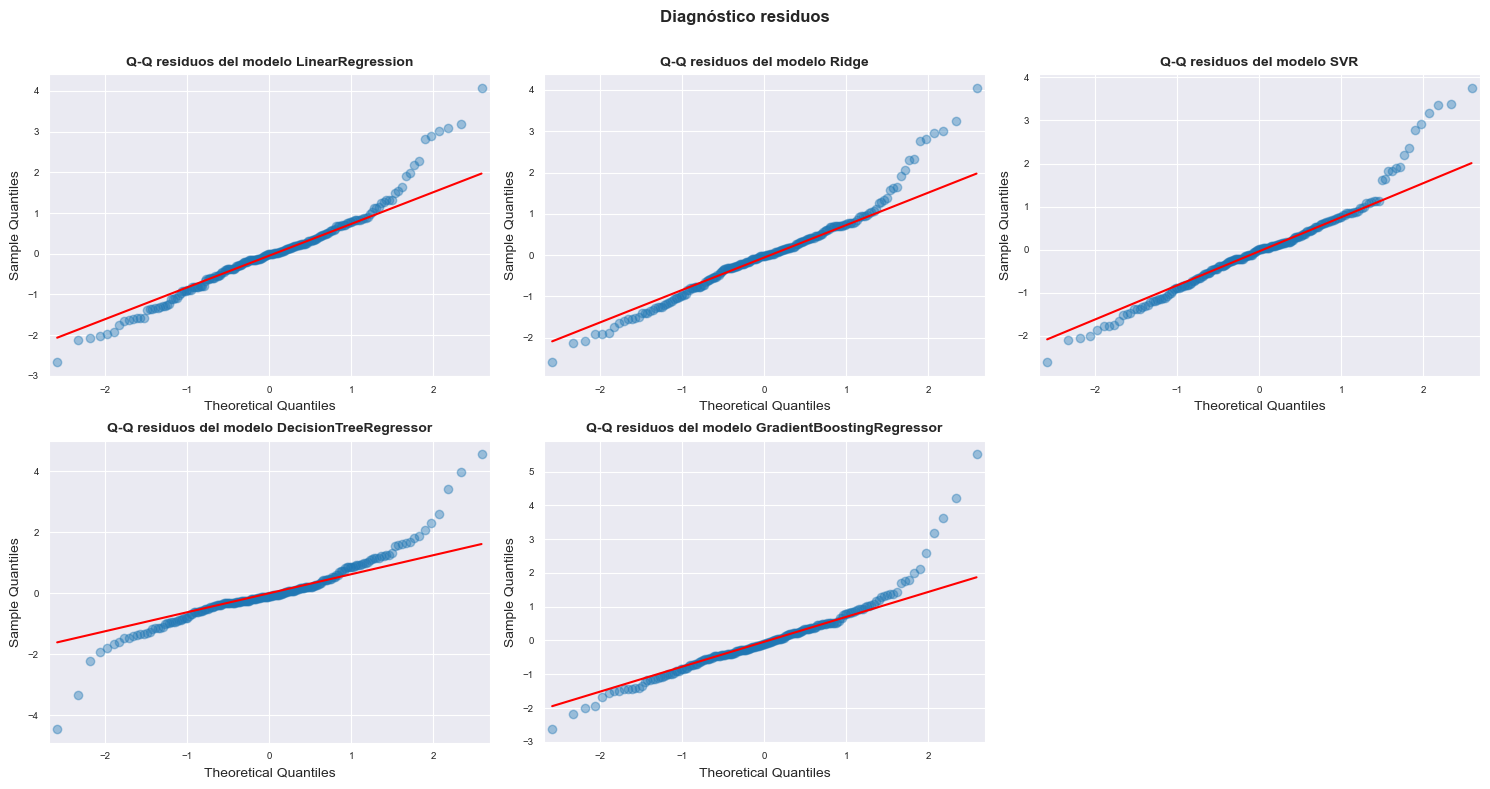

In [44]:
# Diagrama Q-Q


fig, axes = plt.subplots(2, 3, figsize=(15,8))

sm.qqplot(
    error_lm,
    fit   = True,
    line  = 'q',
    ax    = axes[0, 0], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[0, 0].set_title('Q-Q residuos del modelo LinearRegression', fontsize = 10, fontweight = "bold")
axes[0, 0].tick_params(labelsize = 7)


sm.qqplot(
    error_ridge,
    fit   = True,
    line  = 'q',
    ax    = axes[0, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[0, 1].set_title('Q-Q residuos del modelo Ridge', fontsize = 10, fontweight = "bold")
axes[0, 1].tick_params(labelsize = 7)


sm.qqplot(
    error_svr,
    fit   = True,
    line  = 'q',
    ax    = axes[0, 2], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[0, 2].set_title('Q-Q residuos del modelo SVR', fontsize = 10, fontweight = "bold")
axes[0, 2].tick_params(labelsize = 7)



sm.qqplot(
    error_dt,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 0], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 0].set_title('Q-Q residuos del modelo DecisionTreeRegressor', fontsize = 10, fontweight = "bold")
axes[1, 0].tick_params(labelsize = 7)



sm.qqplot(
    error_gb,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo GradientBoostingRegressor', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)


fig.delaxes(axes[1,2])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

# 6.3. Homocedasticidad

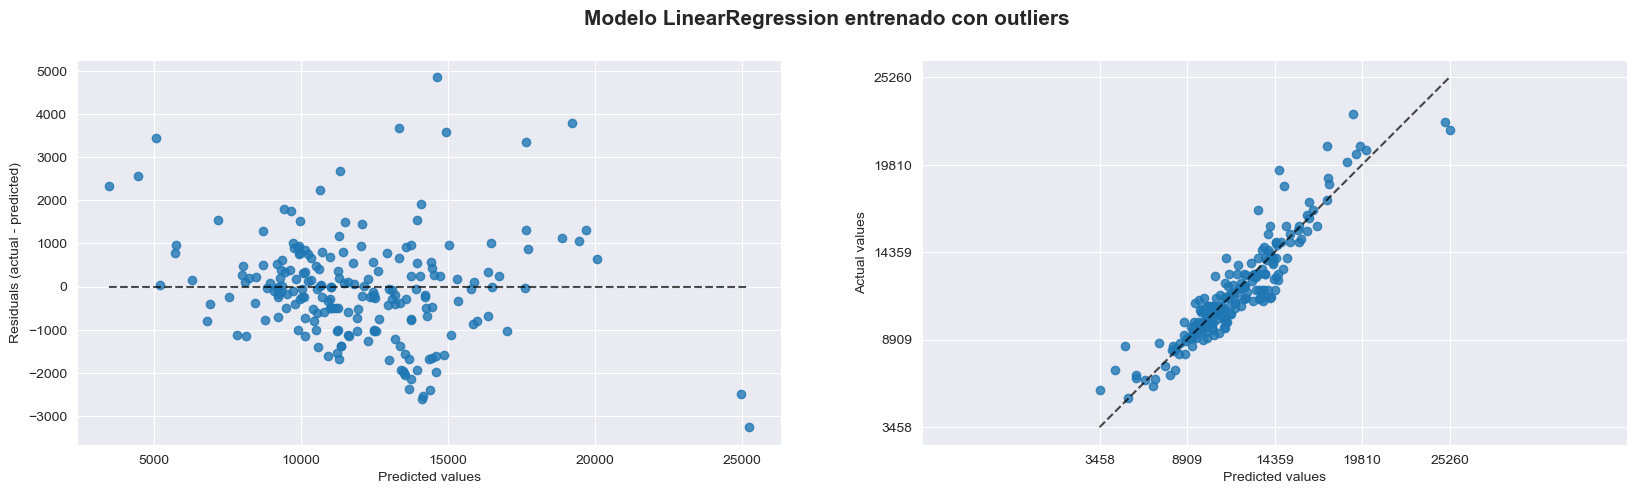

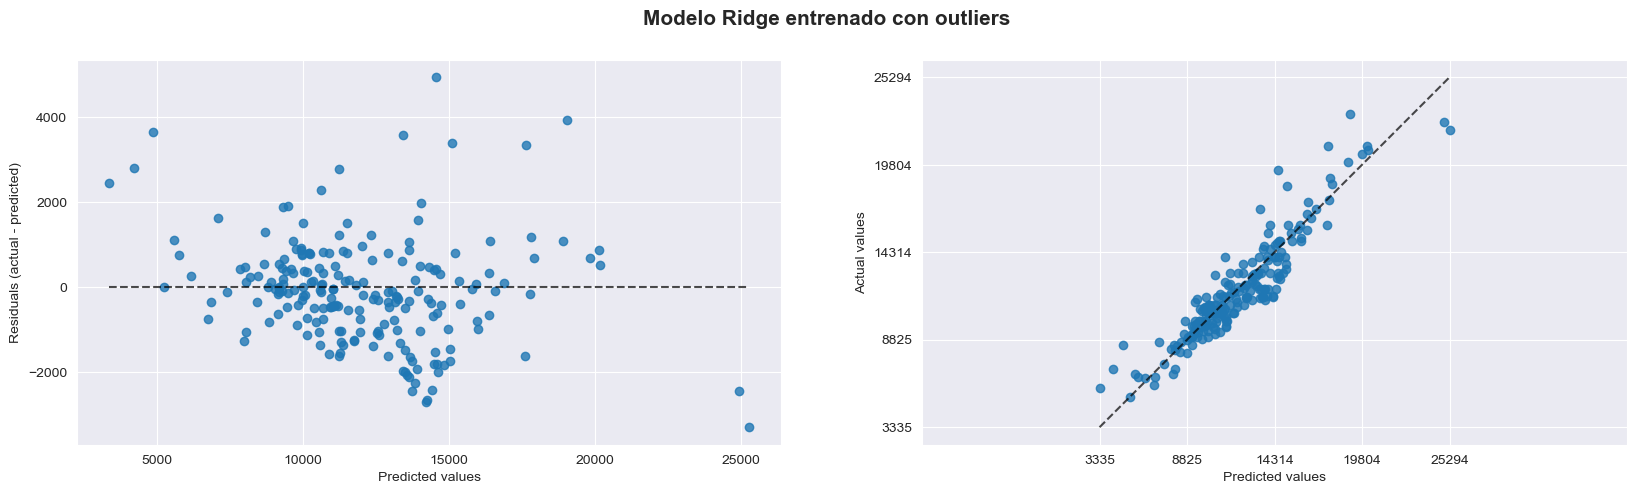

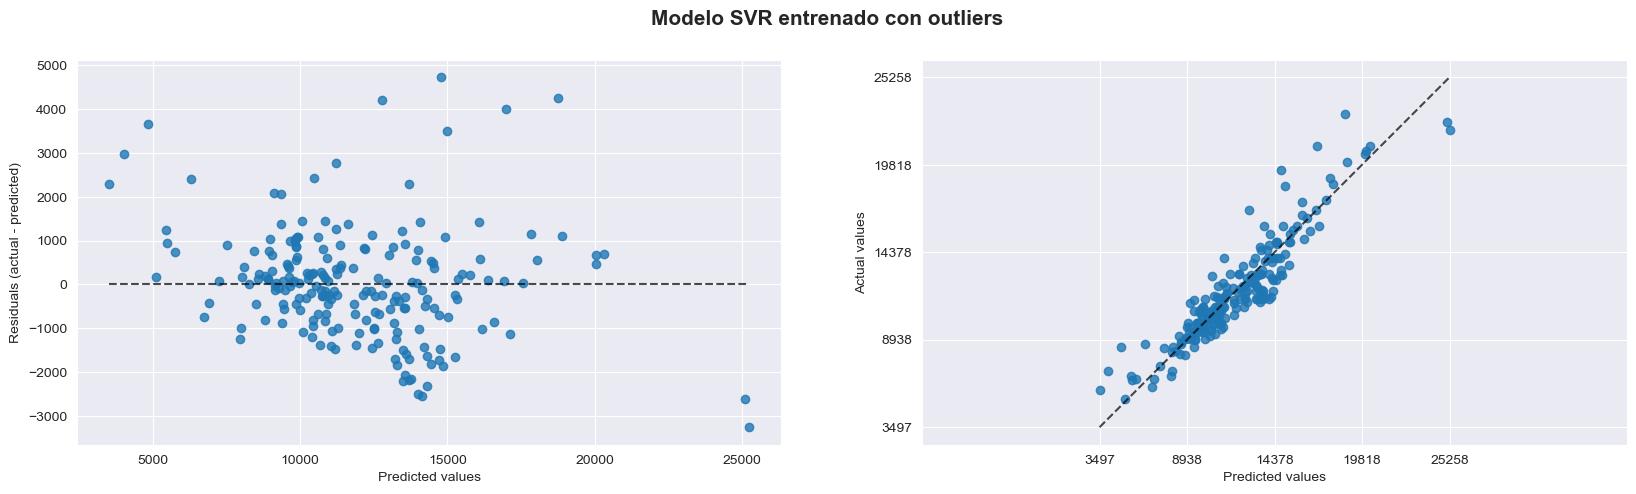

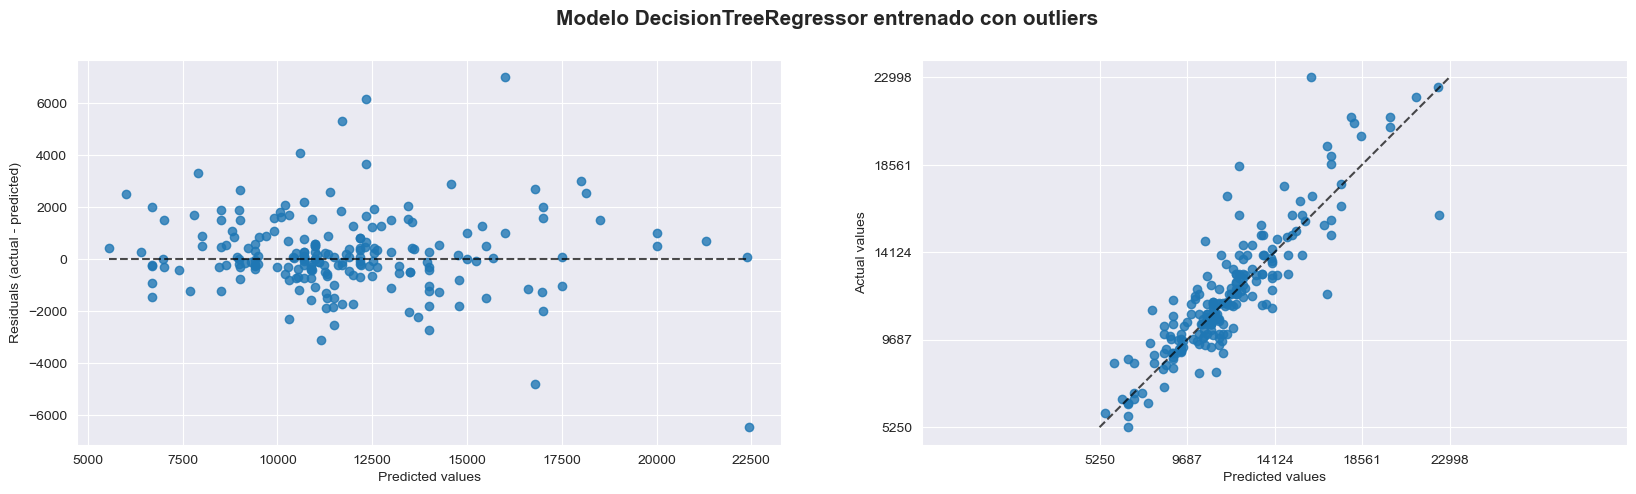

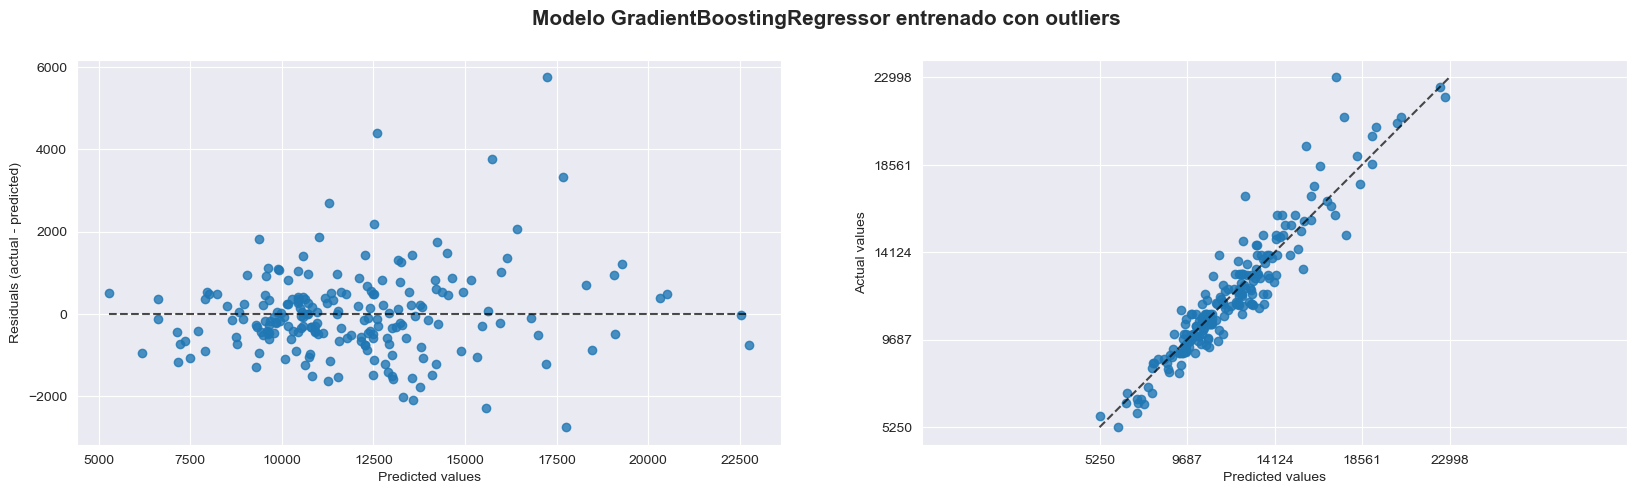

In [45]:
# Representación de residuos

Representar_Resultados(Y_test, y_pred_lr, lr, tipo_datos)
Representar_Resultados(Y_test, y_pred_ridge, best_ridge, tipo_datos)
Representar_Resultados(Y_test, y_pred_svr, best_svr, tipo_datos)
Representar_Resultados(Y_test, y_pred_dt, best_dt, tipo_datos)
Representar_Resultados(Y_test, y_pred_gb, best_gb, tipo_datos)

# 6.4. Independencia

In [46]:
def Calcular_Test_Durbin_Watson(error):
    
    
    df_residuos = pd.DataFrame(error, columns=['ei']).reset_index(drop=True)

    
    df_residuos['ei_2'] = np.square(df_residuos['ei'])

    suma_residuos_al_cuadrado = df_residuos.sum()['ei_2']
    


    df_residuos['ei_menos_1'] = df_residuos['ei'].shift()

    df_residuos.dropna(inplace=True)
    

 
    df_residuos['ei - ei_menos_1'] = df_residuos['ei'] - df_residuos['ei_menos_1']

    df_residuos['diferencia_residuos_al_cuadrado'] = np.square(df_residuos['ei - ei_menos_1'])

    suma_diferencia_residuos_al_cuadrado = df_residuos.sum()['diferencia_residuos_al_cuadrado']
    

    dw = suma_diferencia_residuos_al_cuadrado/suma_residuos_al_cuadrado

    return dw

In [47]:
# Test de Durbin-Watson

errores = [error_lm, error_ridge, error_svr, error_dt, error_gb]

for error in errores:
    print('Test de Durbin-Watson: ', Calcular_Test_Durbin_Watson(error))

Test de Durbin-Watson:  1.9275974303005778
Test de Durbin-Watson:  1.9074891197958515
Test de Durbin-Watson:  1.9042124096034332
Test de Durbin-Watson:  2.18735317331169
Test de Durbin-Watson:  1.9087906183611227
